### Problem statement.

Geely Car Case Study 
Problem Satatement: Geely Auto  aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
 Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know: 
    Which variables are significant in predicting the price of a car?
    How well those variables describe the price of a car?


### Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 205)


In [3]:
path = "/home/aiml/Upgrad/Assignment3/CarPrice_Assignment.csv"
car =  pd.read_csv(path)


In [4]:
car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [5]:
car.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

### Null Value Check 


In [6]:
car.isnull().sum()
# observation : No null values present 

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
#Round the price value of Car to the nearest rupee
car['price'].round()

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
9      17859.0
10     16430.0
11     16925.0
12     20970.0
13     21105.0
14     24565.0
15     30760.0
16     41315.0
17     36880.0
18      5151.0
19      6295.0
20      6575.0
21      5572.0
22      6377.0
23      7957.0
24      6229.0
25      6692.0
26      7609.0
27      8558.0
28      8921.0
29     12964.0
30      6479.0
31      6855.0
32      5399.0
33      6529.0
34      7129.0
35      7295.0
36      7295.0
37      7895.0
38      9095.0
39      8845.0
40     10295.0
41     12945.0
42     10345.0
43      6785.0
44      8916.0
45      8916.0
46     11048.0
47     32250.0
48     35550.0
49     36000.0
50      5195.0
51      6095.0
52      6795.0
53      6695.0
54      7395.0
55     10945.0
56     11845.0
57     13645.0
58     15645.0
59      8845.0
60      8495.0
61     10595.0
62     10245.0
63     10795.0
64     11245.0
65     18280.0
66     183

In [8]:
# Mean Median Mode : 
car['price'].describe()
#Observation : mean and median are not equal, Data is skewed. 

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

## Step 2: Visualising the Data



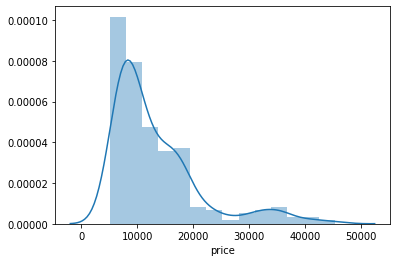

In [9]:
# simple price univariate plot
sns.distplot(car.price)
plt.show()

#### Pair Plots 


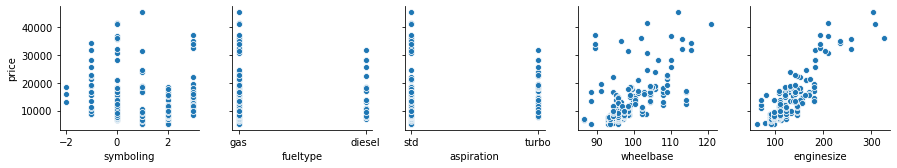

In [10]:
g= sns.pairplot(car,x_vars=['symboling', 'fueltype', 'aspiration','wheelbase', 'enginesize',]
,y_vars=["price"])


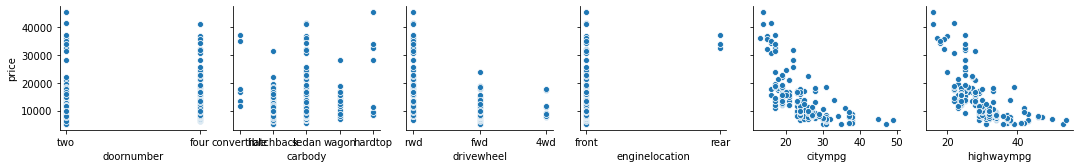

In [11]:
g = sns.pairplot(car,x_vars=['doornumber', 'carbody', 'drivewheel', 'enginelocation', 'citympg', 'highwaympg',]
,y_vars=["price"])

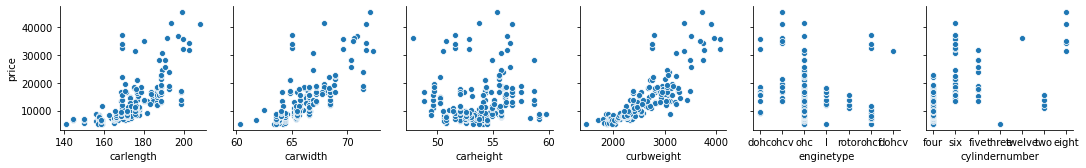

In [12]:
g = sns.pairplot(car,x_vars=['carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', ]
,y_vars=["price"])

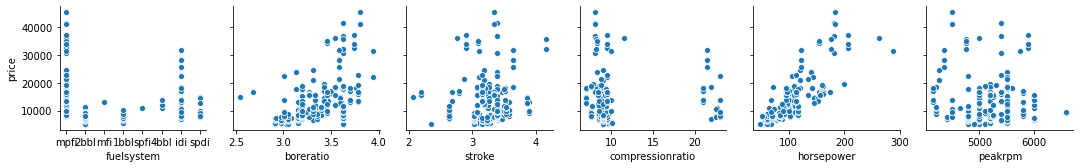

In [690]:
g = sns.pairplot(car,x_vars=[ 'fuelsystem', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm',]
,y_vars=["price"])

In [10]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [11]:
#extract Brand , Model name into diff Cols from Car Name

car['Brand'],car['Model']=  car.CarName.str.split(' ', 1).str

car.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price        Brand         Model  
0          27  13495.0  alfa-romero        giulia  
1          27  16500.0  alfa-romero       stelvio  
2          26  16500.0  alfa-romero  Quadrifoglio  
3          30  13950.0         audi        100 ls  
4          22  17450.0         audi         100ls

In [15]:
car.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

###### Data Cleaning 

In [12]:
# Function to Correct the spelling mistakes

def replace_str(wrong, correct):
    car['Brand']= car['Brand'].str.replace(wrong,correct)


In [13]:

replace_str('toyouta', 'toyota')
replace_str('maxda','mazda')
replace_str('vokswagen','volkswagen')
replace_str('vw', 'volkswagen')
replace_str('Nissan','nissan')
replace_str('porcshce','porsche')

In [14]:
car.Brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Bar plots : 
    
    

In [15]:
def plot_features(pred_var, df): 
    sns.barplot(x= pred_var, y = 'price', data = car)


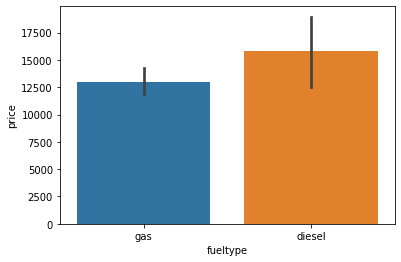

In [16]:
plot_features('fueltype', car)
plt.show()
# diesel Cars are Expensive

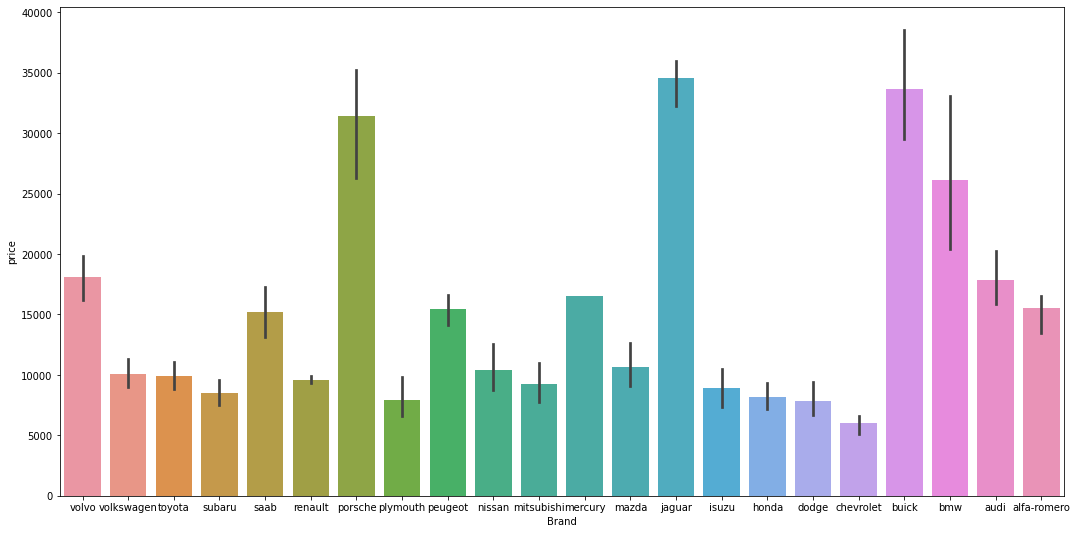

In [17]:
df = car.sort_values(by = 'Brand', ascending=False) 
plt.figure(figsize=(18,9))
sns.barplot(x= 'Brand', y ='price', data = df )
plt.show()
# Jagauar , Porsche , Buick , BMW are Priced high 

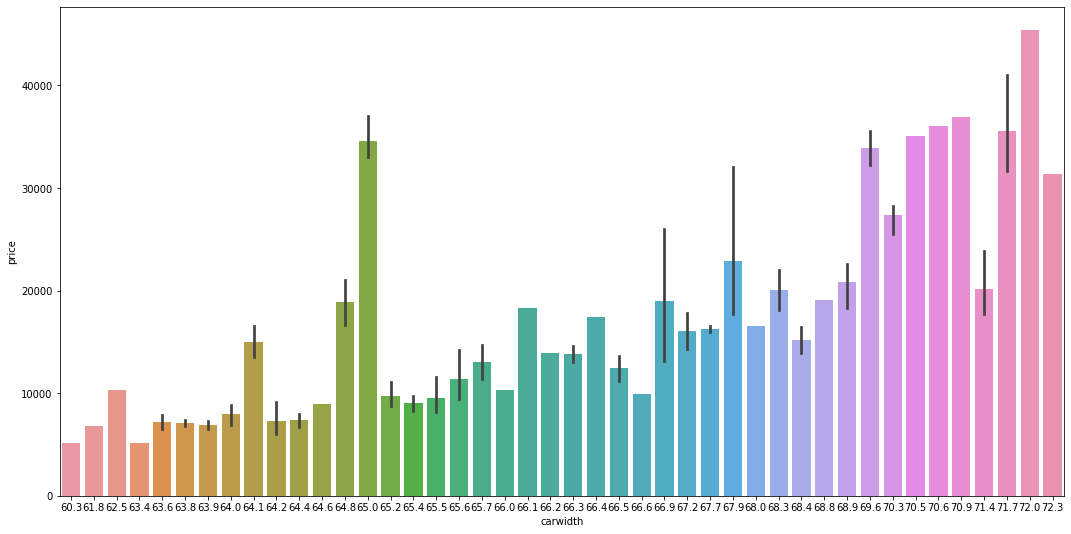

In [18]:
# plt.figure(figsize = (15,9))
df = car.sort_values(by = "carwidth", ascending = True)
plt.figure(figsize=(18,9))
df.head()
sns.barplot(x= 'carwidth', y = 'price' , data = df )
plt.show()

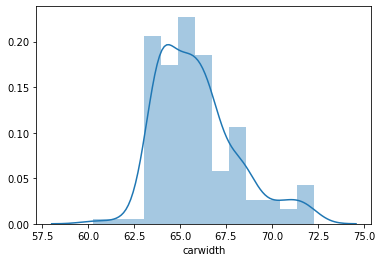

In [19]:
sns.distplot(car.carwidth)
plt.show()

In [20]:
car.describe()


car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

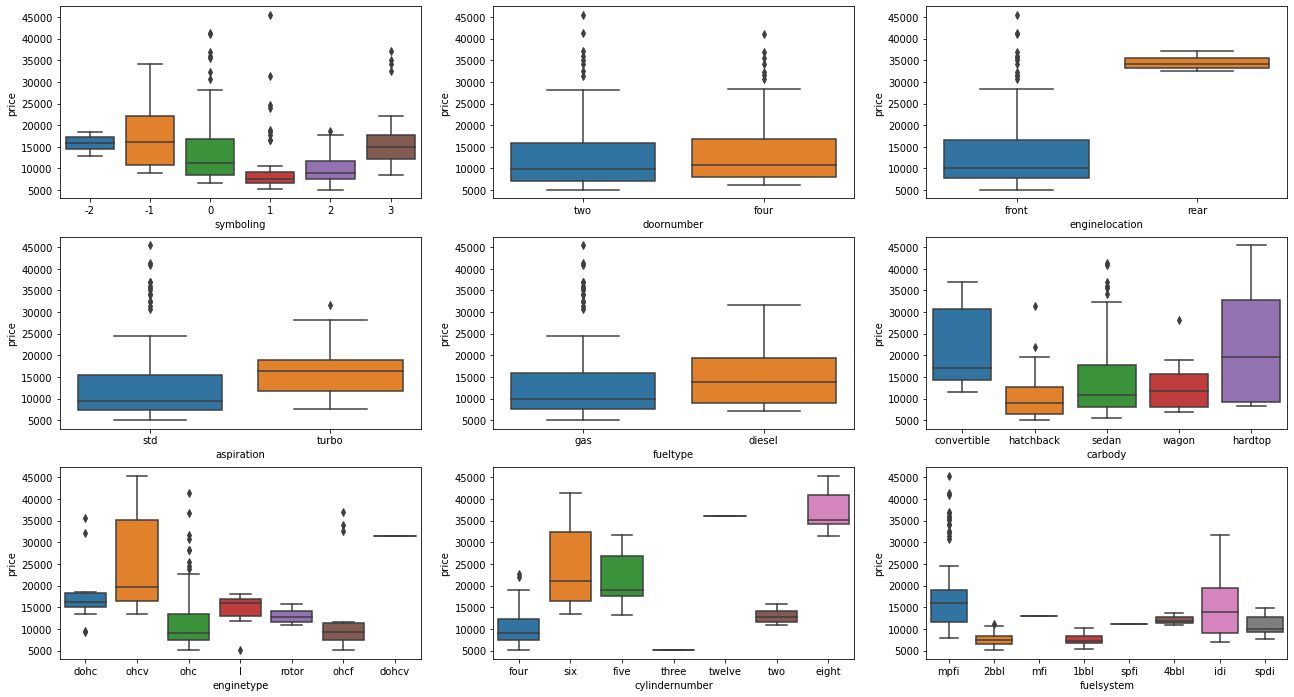

In [21]:
plt.figure(figsize=(22, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car)
plt.subplot(3,3,2)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(3,3,3)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.subplot(3,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(3,3,5)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
plt.subplot(3,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = car)
plt.subplot(3,3,8) 
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car)
  
plt.show()

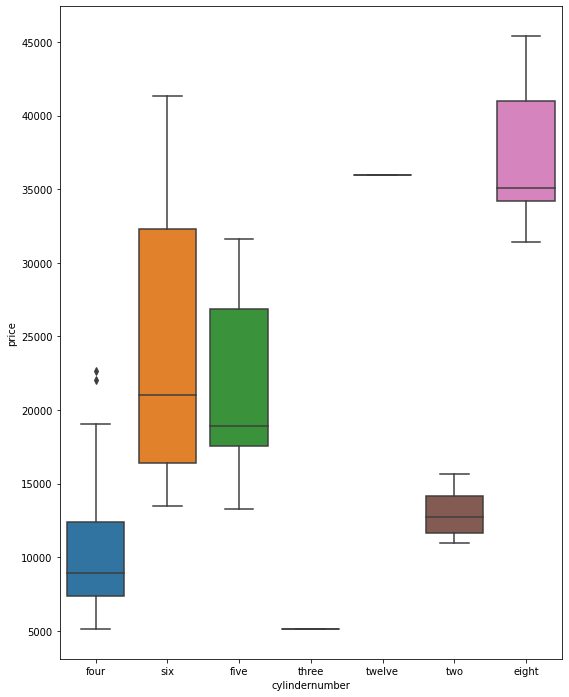

In [22]:
plt.figure(figsize=(9, 12))
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.show()
# No of cylinder is proportional to price .

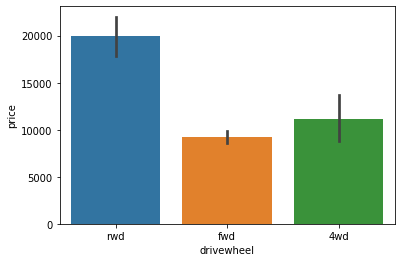

In [23]:
df = car.sort_values(by = 'drivewheel', ascending=False)   
sns.barplot(x= 'drivewheel', y ='price', data = df )
plt.show()
# observation : rwd drivewheel demands more price

### Step 3: Data Preparation

In [27]:
#Data frame Card_df  is craeted for model use
cardf = car
cardf.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price        Brand         Model  
0          27  13495.0  alfa-romero        giulia  
1          27  16500.0  alfa-romero       stelvio  
2          26  16500.0  alfa-romero  Quadrifoglio  
3          30  13950.0         audi        100 ls  
4          22  17450.0         audi         100ls

### Handling Categorical Variables : 

###### Mapping the Binary valued Columns with 1 or 0 

In [28]:
 
# Defining the map function
def binary_map(df,var1, var2) :
    return df.map({var1: 1, var2: 0})

# Applying the function to the housing list
#housing[varlist] = housing[varlist].apply(binary_map)
# loan.loan_status.apply(lambda x: 0 if x=='Fully Paid' else 1)


In [29]:
# Map the cols with binary values
cardf['fueltype']= binary_map(cardf['fueltype'],'gas','diesel')
cardf['aspiration'] = binary_map(cardf['aspiration'], 'std','turbo')
cardf['doornumber'] = binary_map(cardf['doornumber'], 'four', 'two')
cardf['enginelocation'] = binary_map(cardf['enginelocation'], 'front', 'rear')

In [30]:
cardf.head()

car_ID  symboling                   CarName  fueltype  aspiration  \
0       1          3        alfa-romero giulia         1           1   
1       2          3       alfa-romero stelvio         1           1   
2       3          1  alfa-romero Quadrifoglio         1           1   
3       4          2               audi 100 ls         1           1   
4       5          2                audi 100ls         1           1   

   doornumber      carbody drivewheel  enginelocation  wheelbase  carlength  \
0           0  convertible        rwd               1       88.6      168.8   
1           0  convertible        rwd               1       88.6      168.8   
2           0    hatchback        rwd               1       94.5      171.2   
3           1        sedan        fwd               1       99.8      176.6   
4           1        sedan        4wd               1       99.4      176.6   

   carwidth  carheight  curbweight enginetype cylindernumber  enginesize  \
0      64.1       48.8        2548       dohc           four         130   
1      64.1       48.8        2548       dohc           four         130   
2      65.5       52.4        2823       ohcv            six         152   
3      66.2       54.3        2337        ohc           four         109   
4      66.4       54.3        2824        ohc           five         136   

  fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0       mpfi       3.47    2.68               9.0         111     5000   
1       mpfi       3.47    2.68               9.0         111     5000   
2       mpfi       2.68    3.47               9.0         154     5000   
3       mpfi       3.19    3.40              10.0         102     5500   
4       mpfi       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price        Brand         Model  
0       21          27  13495.0  alfa-romero        giulia  
1       21          27  16500.0  alfa-romero       stelvio  
2       19          26  16500.0  alfa-romero  Quadrifoglio  
3       24          30  13950.0         audi        100 ls  
4       18          22  17450.0         audi         100ls

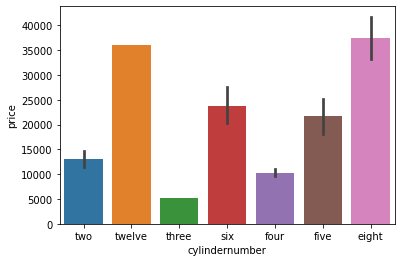

In [31]:
df = cardf.sort_values(by = 'cylindernumber', ascending=False)   
sns.barplot(x= 'cylindernumber', y ='price', data = df )
plt.show()
# observation : the cylinder number increases the price

In [32]:
cardf.columns 

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'Brand', 'Model'],
      dtype='object')

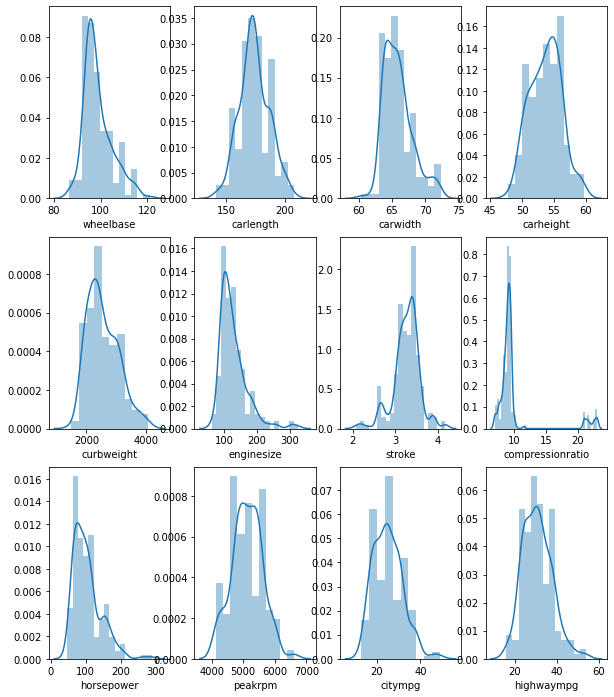

<Figure size 2520x1440 with 0 Axes>

In [33]:
# plots for the numeric varaibles
import matplotlib.pyplot as plt

fig , axes = plt.subplots(nrows=3, ncols=4, figsize=(10,12))
columns = [ 'wheelbase','carlength','carwidth','carheight','curbweight','enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
plt.figure(figsize = (35, 20))
for i, column in enumerate(columns):
    sns.distplot(car[column],ax=axes[i//4,i%4])
   

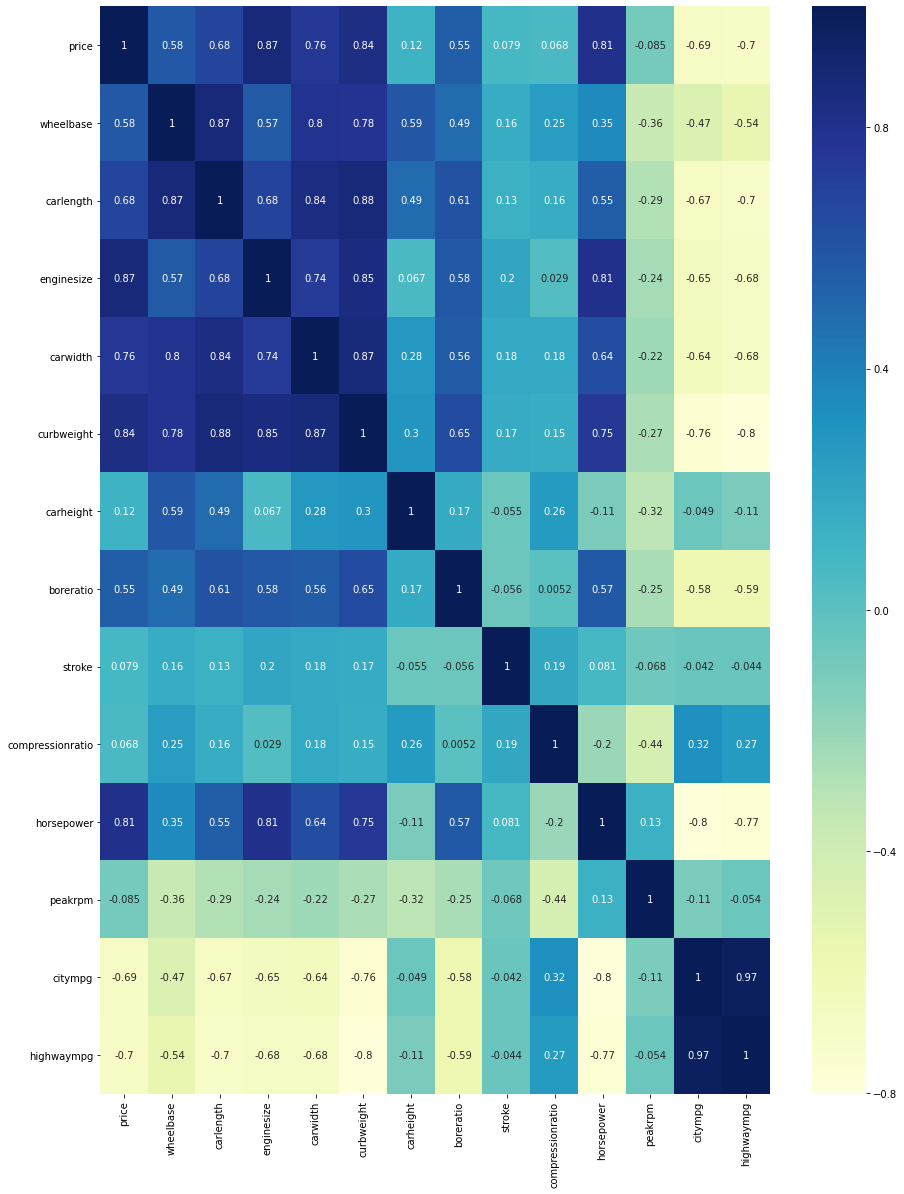

In [26]:
# HeatMap Numeric Col Correalation :
columns= ['price','wheelbase','carlength', 'enginesize','carwidth','curbweight','carheight','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']
df = car[columns]
plt.figure(figsize = (15, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu" )
plt.show()
         #Observation :
    #corelation b/w city and highway mpg 0.97 => drop
    #Corelation b/w wheelbase and carlength => 0.87 -> drop 
    # drop car length  : car width -> 0.84 

###### Preliminary Observations from heat map 


price : positively correlated :  Enginesize, carwidth,boreratio,horsepower, 
       less correlated : carheight, highway,compressionration


Wheel base , carheight carwidth carlength . curbwieght , enginesize, horsepower,'peakrpm','stroke','compressionratio' are highly correlated amongst them
 city mpg and highway mpg are highly correlated hence dropping one of them
#Engine size highly correlated with Horse power

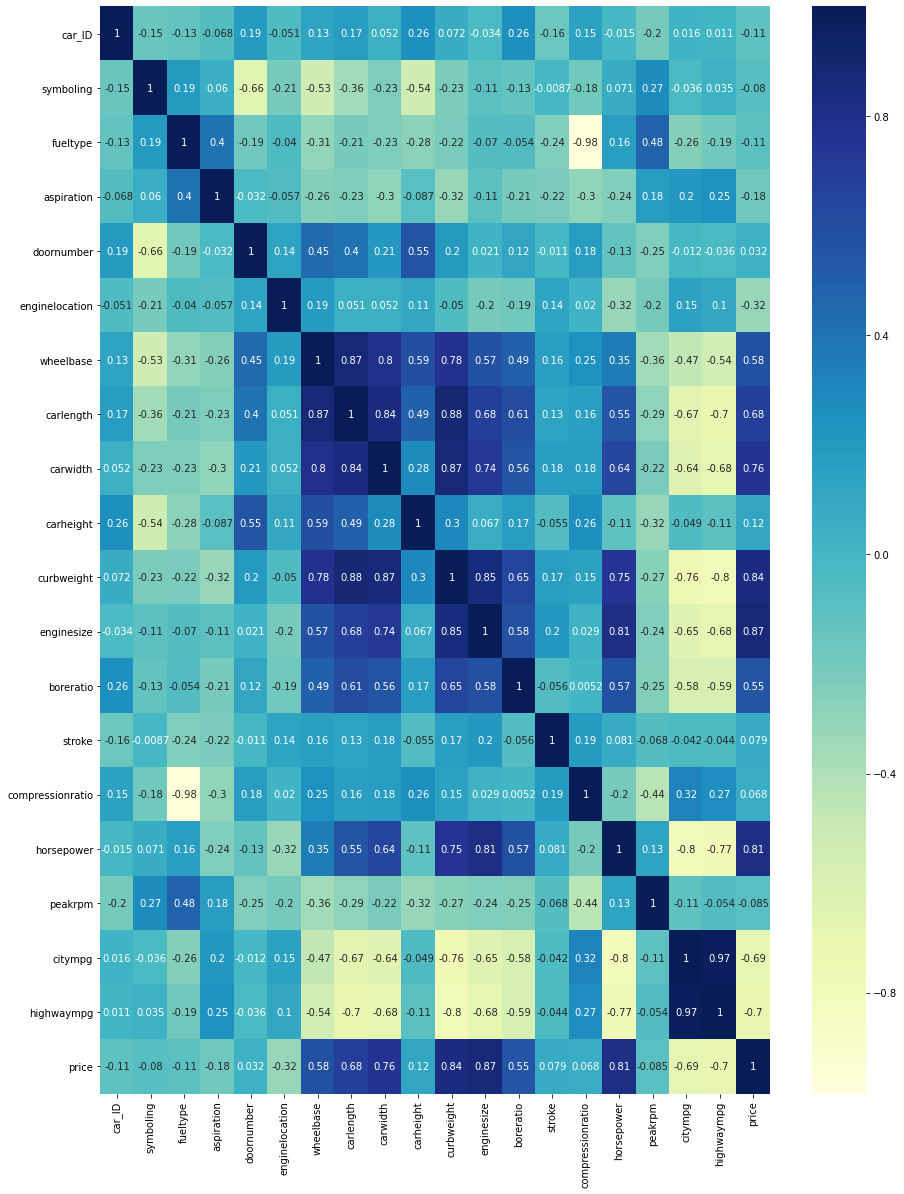

In [27]:
# Heat Map with Binary Values mapped Variable Columns
plt.figure(figsize = (15, 20))

sns.heatmap(cardf.corr(), annot = True ,cmap ="YlGnBu")
plt.show()


In [34]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Brand               0
Model               2
dtype: int64

### Creating Dummy Variables

In [35]:
def dummy_var(col,col_drop,df):
    status = pd.get_dummies(df[col])
    status.drop(col_drop,axis = 1,inplace = True)
    df = pd.concat([df,status],axis = 1)
    return df
    
    

In [36]:
# Dummy Variable for  carbody
cardf = dummy_var('carbody','convertible',cardf)
cardf = dummy_var ('fuelsystem','spfi',cardf)
cardf = dummy_var('drivewheel','4wd', cardf)
cardf = dummy_var ('enginetype','dohcv',cardf)
cardf = dummy_var ('Brand','alfa-romero',cardf)
cardf = dummy_var('cylindernumber','twelve',cardf )
cardf = dummy_var('symboling',3,cardf)



In [37]:
#### drop redundant columns whose dummy variables has been added.
cardf.drop('carbody', axis =1 , inplace = True)
cardf.drop('fuelsystem', axis = 1, inplace = True)
cardf.drop('drivewheel',axis = 1, inplace = True)
cardf.drop('enginetype',axis = 1, inplace = True)
cardf.drop('Brand',axis = 1, inplace = True)
cardf.drop('cylindernumber',axis = 1, inplace = True)
cardf.drop('Model', axis = 1, inplace = True)
cardf.drop('CarName',axis = 1 , inplace = True)
cardf.drop('car_ID', axis =1 , inplace = True)
cardf.drop('symboling', axis =1 , inplace = True)



In [38]:
# Rounding Price value
cardf.price.round()

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
5      15250.0
6      17710.0
7      18920.0
8      23875.0
9      17859.0
10     16430.0
11     16925.0
12     20970.0
13     21105.0
14     24565.0
15     30760.0
16     41315.0
17     36880.0
18      5151.0
19      6295.0
20      6575.0
21      5572.0
22      6377.0
23      7957.0
24      6229.0
25      6692.0
26      7609.0
27      8558.0
28      8921.0
29     12964.0
30      6479.0
31      6855.0
32      5399.0
33      6529.0
34      7129.0
35      7295.0
36      7295.0
37      7895.0
38      9095.0
39      8845.0
40     10295.0
41     12945.0
42     10345.0
43      6785.0
44      8916.0
45      8916.0
46     11048.0
47     32250.0
48     35550.0
49     36000.0
50      5195.0
51      6095.0
52      6795.0
53      6695.0
54      7395.0
55     10945.0
56     11845.0
57     13645.0
58     15645.0
59      8845.0
60      8495.0
61     10595.0
62     10245.0
63     10795.0
64     11245.0
65     18280.0
66     183

In [39]:
#  dummy varaibles and binary values mapped  columns
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int64  
 1   aspiration        205 non-null    int64  
 2   doornumber        205 non-null    int64  
 3   enginelocation    205 non-null    int64  
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginesize        205 non-null    int64  
 10  boreratio         205 non-null    float64
 11  stroke            205 non-null    float64
 12  compressionratio  205 non-null    float64
 13  horsepower        205 non-null    int64  
 14  peakrpm           205 non-null    int64  
 15  citympg           205 non-null    int64  
 16  highwaympg        205 non-null    int64  
 1

In [40]:


cardf.columns

Index([        'fueltype',       'aspiration',       'doornumber',
         'enginelocation',        'wheelbase',        'carlength',
               'carwidth',        'carheight',       'curbweight',
             'enginesize',        'boreratio',           'stroke',
       'compressionratio',       'horsepower',          'peakrpm',
                'citympg',       'highwaympg',            'price',
                'hardtop',        'hatchback',            'sedan',
                  'wagon',             '1bbl',             '2bbl',
                   '4bbl',              'idi',              'mfi',
                   'mpfi',             'spdi',              'fwd',
                    'rwd',             'dohc',                'l',
                    'ohc',             'ohcf',             'ohcv',
                  'rotor',             'audi',              'bmw',
                  'buick',        'chevrolet',            'dodge',
                  'honda',            'isuzu',           'jagu

In [74]:
cardf.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  205.000000  205.000000  205.000000      205.000000  205.000000   
mean     0.902439    0.819512    0.560976        0.985366   98.756585   
std      0.297446    0.385535    0.497483        0.120377    6.021776   
min      0.000000    0.000000    0.000000        0.000000   86.600000   
25%      1.000000    1.000000    0.000000        1.000000   94.500000   
50%      1.000000    1.000000    1.000000        1.000000   97.000000   
75%      1.000000    1.000000    1.000000        1.000000  102.400000   
max      1.000000    1.000000    1.000000        1.000000  120.900000   

        carlength    carwidth   carheight   curbweight  enginesize  \
count  205.000000  205.000000  205.000000   205.000000  205.000000   
mean   174.049268   65.907805   53.724878  2555.565854  126.907317   
std     12.337289    2.145204    2.443522   520.680204   41.642693   
min    141.100000   60.300000   47.800000  1488.000000   61.000000   
25%    166.300000   64.100000   52.000000  2145.000000   97.000000   
50%    173.200000   65.500000   54.100000  2414.000000  120.000000   
75%    183.100000   66.900000   55.500000  2935.000000  141.000000   
max    208.100000   72.300000   59.800000  4066.000000  326.000000   

        boreratio      stroke  compressionratio  horsepower      peakrpm  \
count  205.000000  205.000000        205.000000  205.000000   205.000000   
mean     3.329756    3.255415         10.142537  104.117073  5125.121951   
std      0.270844    0.313597          3.972040   39.544167   476.985643   
min      2.540000    2.070000          7.000000   48.000000  4150.000000   
25%      3.150000    3.110000          8.600000   70.000000  4800.000000   
50%      3.310000    3.290000          9.000000   95.000000  5200.000000   
75%      3.580000    3.410000          9.400000  116.000000  5500.000000   
max      3.940000    4.170000         23.000000  288.000000  6600.000000   

          citympg  highwaympg         price     hardtop   hatchback  \
count  205.000000  205.000000    205.000000  205.000000  205.000000   
mean    25.219512   30.751220  13276.710571    0.039024    0.341463   
std      6.542142    6.886443   7988.852332    0.194127    0.475361   
min     13.000000   16.000000   5118.000000    0.000000    0.000000   
25%     19.000000   25.000000   7788.000000    0.000000    0.000000   
50%     24.000000   30.000000  10295.000000    0.000000    0.000000   
75%     30.000000   34.000000  16503.000000    0.000000    1.000000   
max     49.000000   54.000000  45400.000000    1.000000    1.000000   

            sedan       wagon        1bbl        2bbl        4bbl         idi  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.468293    0.121951    0.053659    0.321951    0.014634    0.097561   
std      0.500215    0.328031    0.225894    0.468368    0.120377    0.297446   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              mfi        mpfi        spdi         fwd         rwd        dohc  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.004878    0.458537    0.043902    0.585366    0.370732    0.058537   
std      0.069843    0.499498    0.205380    0.493865    0.484183    0.235330   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    1.000000    0.000000    0.000000   
75%      0.000000    1.000000    0.000000    1.000000    1.000000    0.000000   
max      1.000000

In [42]:
cardf.rename(columns={-2: "6_safe", -1: "5_safe", 0 : "4_safe", 1:"3_safe" , 2:"2_safe" , 3 :"1_safe"},inplace = True)

### Step 4: Model Building 

#### Test , Train Split

In [79]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cardf, train_size = 0.7, test_size = 0.3)
df_test

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
52          1           1           0               1       93.1      159.1   
181         1           1           1               1      104.5      187.8   
5           1           1           0               1       99.8      177.3   
18          1           1           0               1       88.4      141.1   
188         1           1           1               1       97.3      171.7   
170         1           1           0               1       98.4      176.2   
76          1           1           0               1       93.7      157.3   
154         1           1           1               1       95.7      169.7   
104         1           1           0               1       91.3      170.7   
33          1           1           0               1       93.7      150.0   
12          1           1           0               1      101.2      176.8   
129         1           1           0               1       98.4      175.7   
55          1           1           0               1       95.3      169.0   
66          0           1           1               1      104.9      175.0   
45          1           1           1               1       94.5      155.9   
169         1           1           0               1       98.4      176.2   
130         1           1           1               1       96.1      181.5   
7           1           1           1               1      105.8      192.7   
37          1           1           0               1       96.5      167.5   
152         1           1           1               1       95.7      158.7   
80          1           0           0               1       96.3      173.0   
111         1           1           1               1      107.9      186.7   
131         1           1           0               1       96.1      176.8   
171         1           1           0               1       98.4      176.2   
179         1           1           0               1      102.9      183.5   
138         1           1           0               1       93.7      156.9   
156         1           1           1               1       95.7      166.3   
113         1           1           1               1      114.2      198.9   
161         1           1           1               1       95.7      166.3   
89          1           1           0               1       94.5      165.3   
183         1           1           0               1       97.3      171.7   
193         1           1           1               1      100.4      183.1   
125         1           1           0               1       94.5      168.9   
173         1           1           1               1      102.4      175.6   
92          1           1           1               1       94.5      165.3   
16          1           1           0               1      103.5      193.8   
189         1           1           0               1       94.5      159.3   
136         1           0           0               1       99.1      186.6   
22          1           1           0               1       93.7      157.3   
74          1           1           0               1      112.0      199.2   
44          1           1           0               1       94.5      155.9   
4           1           1           1               1       99.4      176.6   
71          1           1           1               1      115.6      202.6   
134         1           1           0               1       99.1      186.6   
145         1           0           1               1       97.0      172.0   
122         1           1           1               1       93.7      167.3   
26          1           1           1               1       93.7      157.3   
83          1           0           0               1       95.9      173.2   
149         1           0           1               1       96.9      173.6   
186         1           1           1               1  

In [80]:
df_test

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
52          1           1           0               1       93.1      159.1   
181         1           1           1               1      104.5      187.8   
5           1           1           0               1       99.8      177.3   
18          1           1           0               1       88.4      141.1   
188         1           1           1               1       97.3      171.7   
170         1           1           0               1       98.4      176.2   
76          1           1           0               1       93.7      157.3   
154         1           1           1               1       95.7      169.7   
104         1           1           0               1       91.3      170.7   
33          1           1           0               1       93.7      150.0   
12          1           1           0               1      101.2      176.8   
129         1           1           0               1       98.4      175.7   
55          1           1           0               1       95.3      169.0   
66          0           1           1               1      104.9      175.0   
45          1           1           1               1       94.5      155.9   
169         1           1           0               1       98.4      176.2   
130         1           1           1               1       96.1      181.5   
7           1           1           1               1      105.8      192.7   
37          1           1           0               1       96.5      167.5   
152         1           1           1               1       95.7      158.7   
80          1           0           0               1       96.3      173.0   
111         1           1           1               1      107.9      186.7   
131         1           1           0               1       96.1      176.8   
171         1           1           0               1       98.4      176.2   
179         1           1           0               1      102.9      183.5   
138         1           1           0               1       93.7      156.9   
156         1           1           1               1       95.7      166.3   
113         1           1           1               1      114.2      198.9   
161         1           1           1               1       95.7      166.3   
89          1           1           0               1       94.5      165.3   
183         1           1           0               1       97.3      171.7   
193         1           1           1               1      100.4      183.1   
125         1           1           0               1       94.5      168.9   
173         1           1           1               1      102.4      175.6   
92          1           1           1               1       94.5      165.3   
16          1           1           0               1      103.5      193.8   
189         1           1           0               1       94.5      159.3   
136         1           0           0               1       99.1      186.6   
22          1           1           0               1       93.7      157.3   
74          1           1           0               1      112.0      199.2   
44          1           1           0               1       94.5      155.9   
4           1           1           1               1       99.4      176.6   
71          1           1           1               1      115.6      202.6   
134         1           1           0               1       99.1      186.6   
145         1           0           1               1       97.0      172.0   
122         1           1           1               1       93.7      167.3   
26          1           1           1               1       93.7      157.3   
83          1           0           0               1       95.9      173.2   
149         1           0           1               1       96.9      173.6   
186         1           1           1               1  

In [50]:
df_test

fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
52          1           1           0               1       93.1      159.1   
181         1           1           1               1      104.5      187.8   
5           1           1           0               1       99.8      177.3   
18          1           1           0               1       88.4      141.1   
188         1           1           1               1       97.3      171.7   
170         1           1           0               1       98.4      176.2   
76          1           1           0               1       93.7      157.3   
154         1           1           1               1       95.7      169.7   
104         1           1           0               1       91.3      170.7   
33          1           1           0               1       93.7      150.0   
12          1           1           0               1      101.2      176.8   
129         1           1           0               1       98.4      175.7   
55          1           1           0               1       95.3      169.0   
66          0           1           1               1      104.9      175.0   
45          1           1           1               1       94.5      155.9   
169         1           1           0               1       98.4      176.2   
130         1           1           1               1       96.1      181.5   
7           1           1           1               1      105.8      192.7   
37          1           1           0               1       96.5      167.5   
152         1           1           1               1       95.7      158.7   
80          1           0           0               1       96.3      173.0   
111         1           1           1               1      107.9      186.7   
131         1           1           0               1       96.1      176.8   
171         1           1           0               1       98.4      176.2   
179         1           1           0               1      102.9      183.5   
138         1           1           0               1       93.7      156.9   
156         1           1           1               1       95.7      166.3   
113         1           1           1               1      114.2      198.9   
161         1           1           1               1       95.7      166.3   
89          1           1           0               1       94.5      165.3   
183         1           1           0               1       97.3      171.7   
193         1           1           1               1      100.4      183.1   
125         1           1           0               1       94.5      168.9   
173         1           1           1               1      102.4      175.6   
92          1           1           1               1       94.5      165.3   
16          1           1           0               1      103.5      193.8   
189         1           1           0               1       94.5      159.3   
136         1           0           0               1       99.1      186.6   
22          1           1           0               1       93.7      157.3   
74          1           1           0               1      112.0      199.2   
44          1           1           0               1       94.5      155.9   
4           1           1           1               1       99.4      176.6   
71          1           1           1               1      115.6      202.6   
134         1           1           0               1       99.1      186.6   
145         1           0           1               1       97.0      172.0   
122         1           1           1               1       93.7      167.3   
26          1           1           1               1       93.7      157.3   
83          1           0           0               1       95.9      173.2   
149         1           0           1               1       96.9      173.6   
186         1           1           1               1  

In [346]:
# Numeric variables:price , wheelbase, 'carlength',carwidth, carheight,curbweight,enginesize,'horsepower', stroke,compressionratio, 'boreratio', 'highwaympg',citympg
df_train.columns

Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan',
       'wagon', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'fwd',
       'rwd', 'dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'eight',
       'five', 'four', 'six', 'three', 'two', '6_safe', '5_safe', '4_safe',
       '3_safe', '2_safe'],
      dtype='object')

### Rescaling:  Features

In [347]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [348]:
# Rescale numerical columns
num_vars = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price' ]

In [349]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()
#observation : Numerical Col values are between 0 and 1 

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.818182    0.559441        0.993007    0.411141   
std      0.288490    0.387050    0.498199        0.083624    0.205581   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.272414   
50%      1.000000    1.000000    1.000000        1.000000    0.341379   
75%      1.000000    1.000000    1.000000        1.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

        carlength    carwidth   carheight  curbweight  enginesize   boreratio  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.525476    0.461655    0.509004    0.407878    0.241351    0.497946   
std      0.204848    0.184517    0.215378    0.211269    0.154619    0.207140   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.399187    0.304167    0.353982    0.245539    0.135849    0.305556   
50%      0.502439    0.425000    0.522124    0.355702    0.184906    0.500000   
75%      0.669919    0.550000    0.668142    0.559542    0.301887    0.682540   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           stroke  compressionratio  horsepower     peakrpm     citympg  \
count  143.000000        143.000000  143.000000  143.000000  143.000000   
mean     0.535389          0.190787    0.227302    0.400029    0.344211   
std      0.157843          0.237181    0.165511    0.196438    0.186165   
min      0.000000          0.000000    0.000000    0.000000    0.000000   
25%      0.464646          0.100000    0.091667    0.265306    0.166667   
50%      0.545455          0.125000    0.191667    0.428571    0.333333   
75%      0.611111          0.150000    0.283333    0.551020    0.500000   
max      1.000000          1.000000    1.000000    1.000000    1.000000   

       highwaympg       price     hardtop   hatchback       sedan       wagon  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.374976    0.219310    0.020979    0.342657    0.475524    0.132867   
std      0.188477    0.215682    0.143818    0.476266    0.501156    0.340624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.216216    0.067298    0.000000    0.000000    0.000000    0.000000   
50%      0.378378    0.140343    0.000000    0.000000    0.000000    0.000000   
75%      0.527027    0.313479    0.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             1bbl        2bbl        4bbl         idi    mfi        mpfi  \
count  143.000000  143.000000  143.000000  143.000000  143.0  143.000000   
mean     0.055944    0.349650    0.020979    0.090909    0.0    0.440559   
std      0.230621    0.478536    0.143818    0.288490    0.0    0.498199   
min      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
75%      0.000000    1.000000    0.000000    0.000000    0.0    1.000000   
max      1.000000    1.000000    1.000000    1.000000    0.0    1.000000   

             spdi         fwd         rwd        dohc           l         ohc  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.041958    0.594406    0.349650    0.069930    0.062937    0.685315   
std      0.201198    0.492733    0.478536    0.255926    0.243703    0.466023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000   

In [350]:
df_train.price.count()

# Observation : 70% training data set 

143

In [351]:
df_test.price.count()
# Observation : 30% test data set 

62

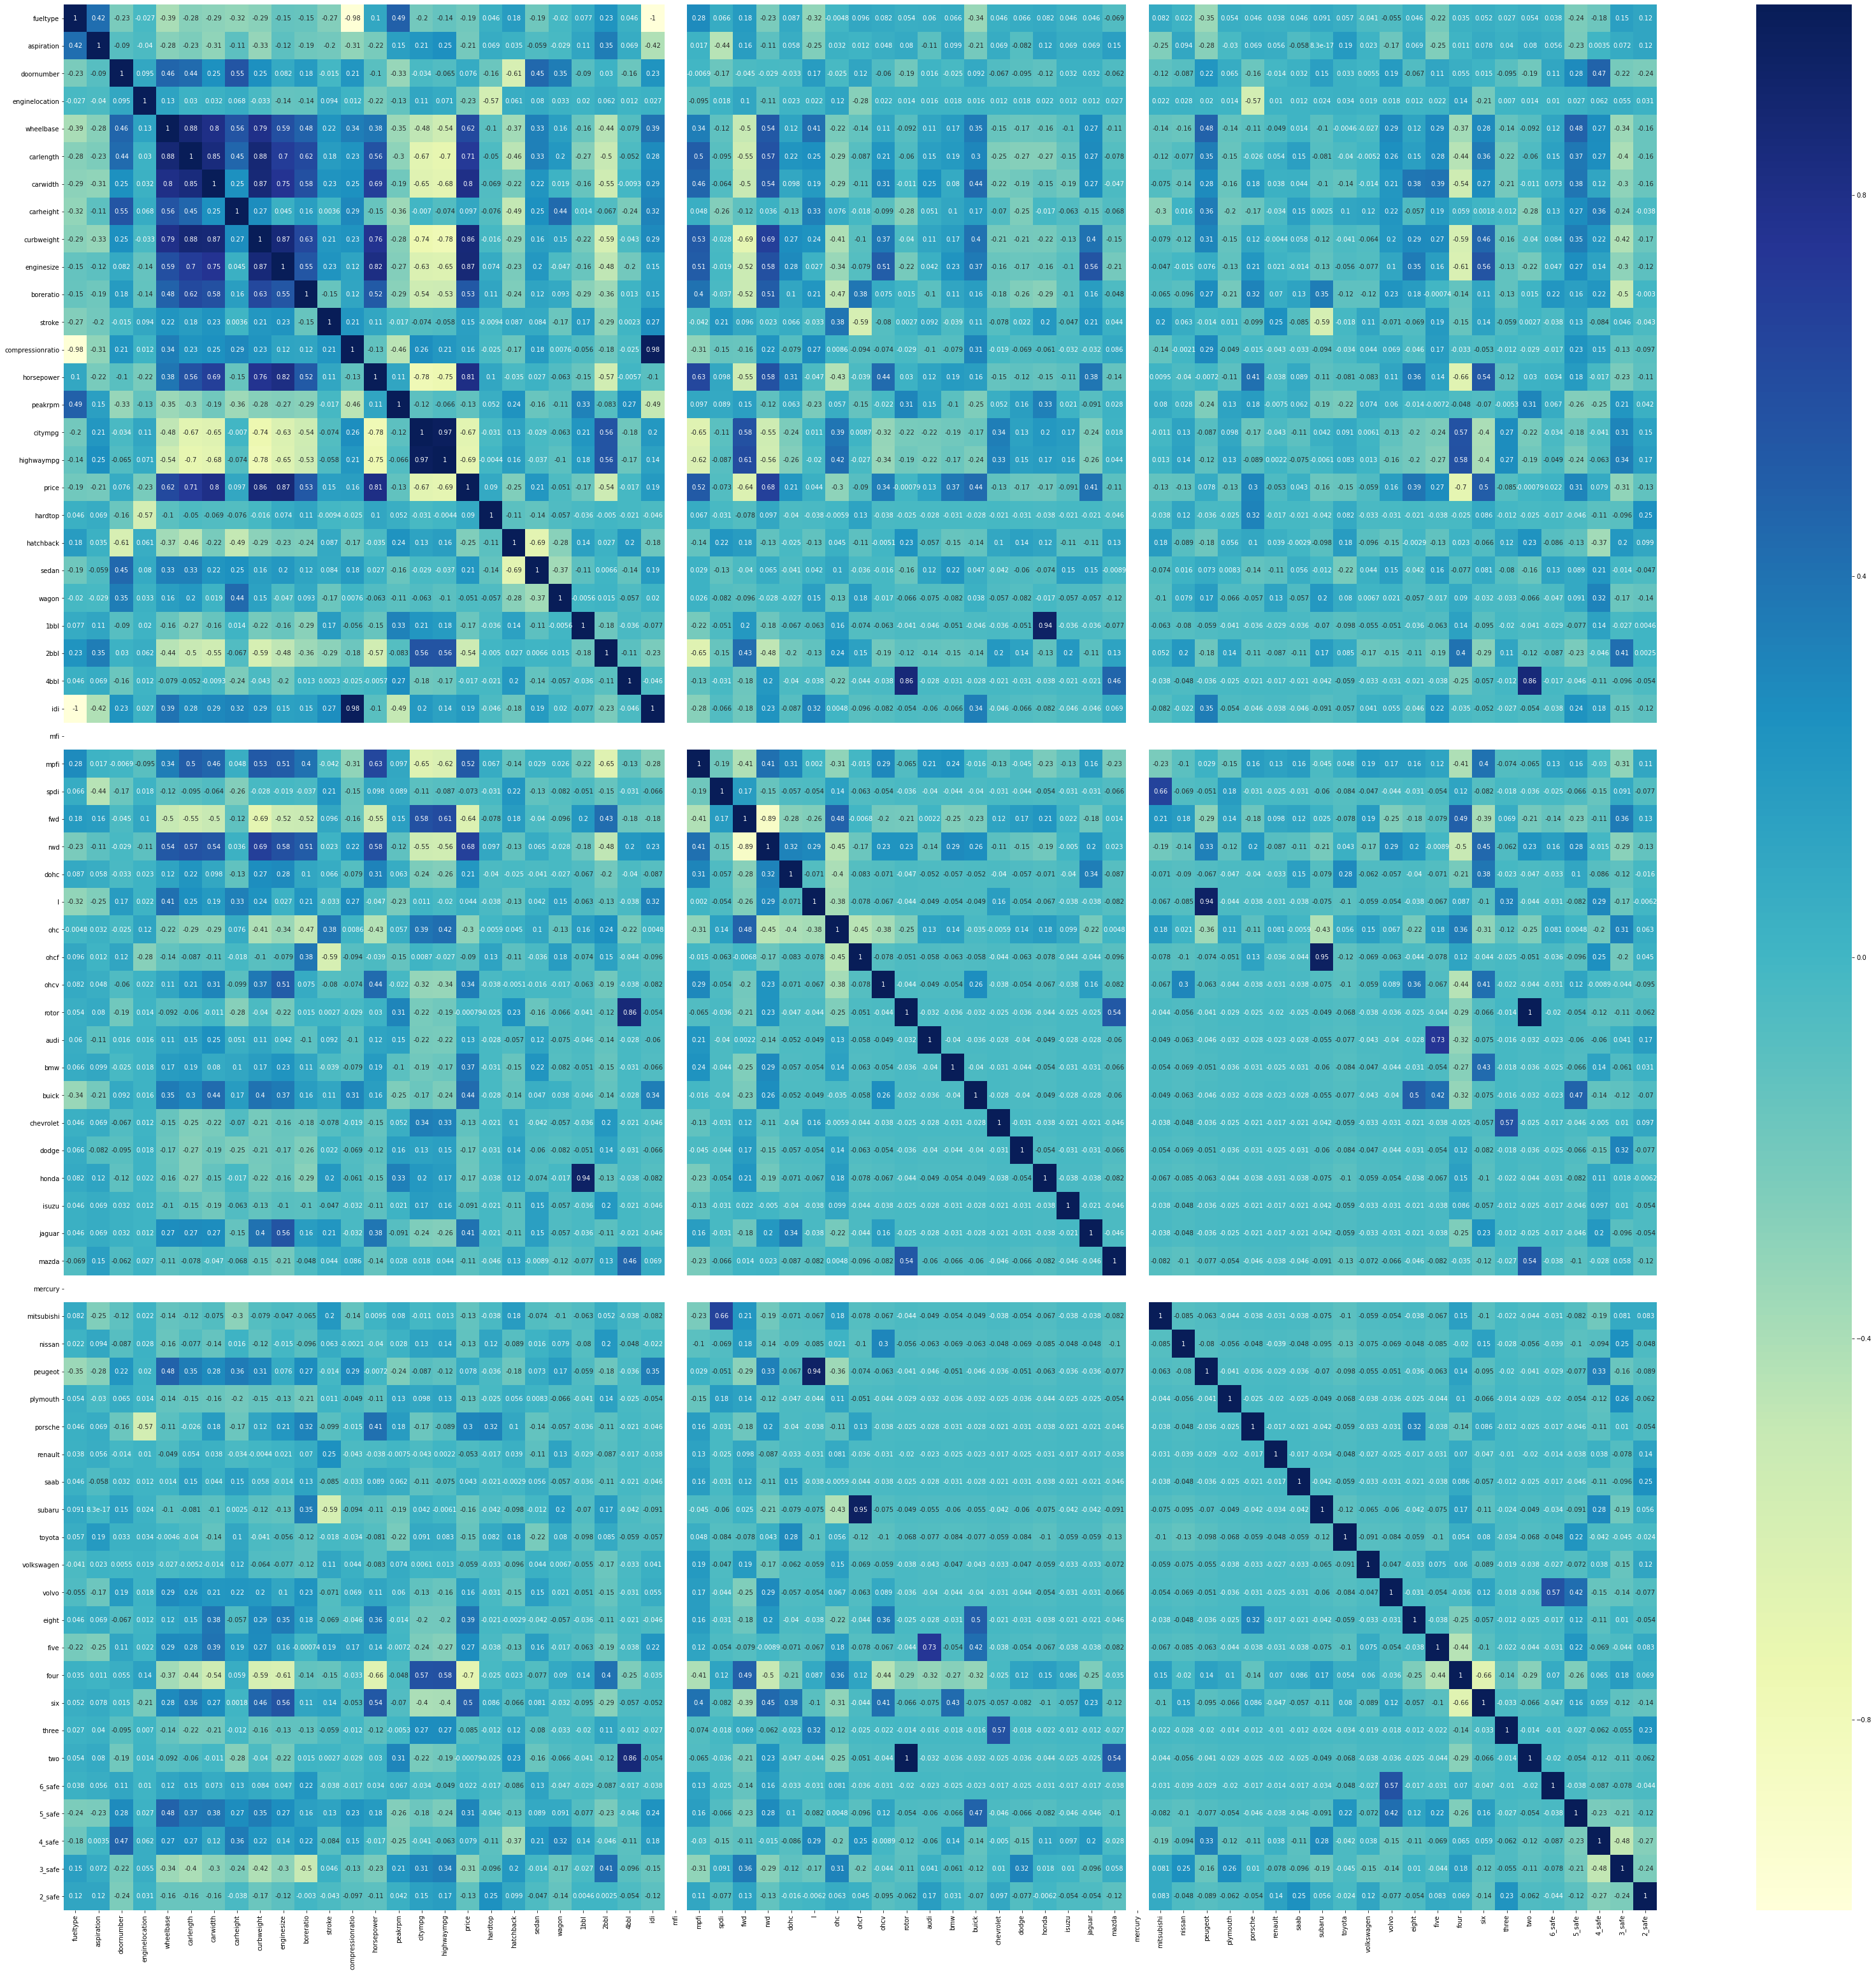

In [272]:
# Let's check the correlation coefficients to  decide which columns may be dropped

plt.figure(figsize = (56, 55))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [352]:
# mercury , mfi drop based on heatmap corr 
df_train.drop(['mercury','mfi'], axis = 1, inplace = True)

In [353]:
# dropping cols which are nearly neutral to price Value.

cols_to_drop=df_train.corr()[(df_train.corr()['price']<=0.5) & (df_train.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
df_train.drop(cols_to_drop,axis=1,inplace=True)
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price', '2bbl',
       'mpfi', 'fwd', 'rwd', 'four', 'six'],
      dtype='object')

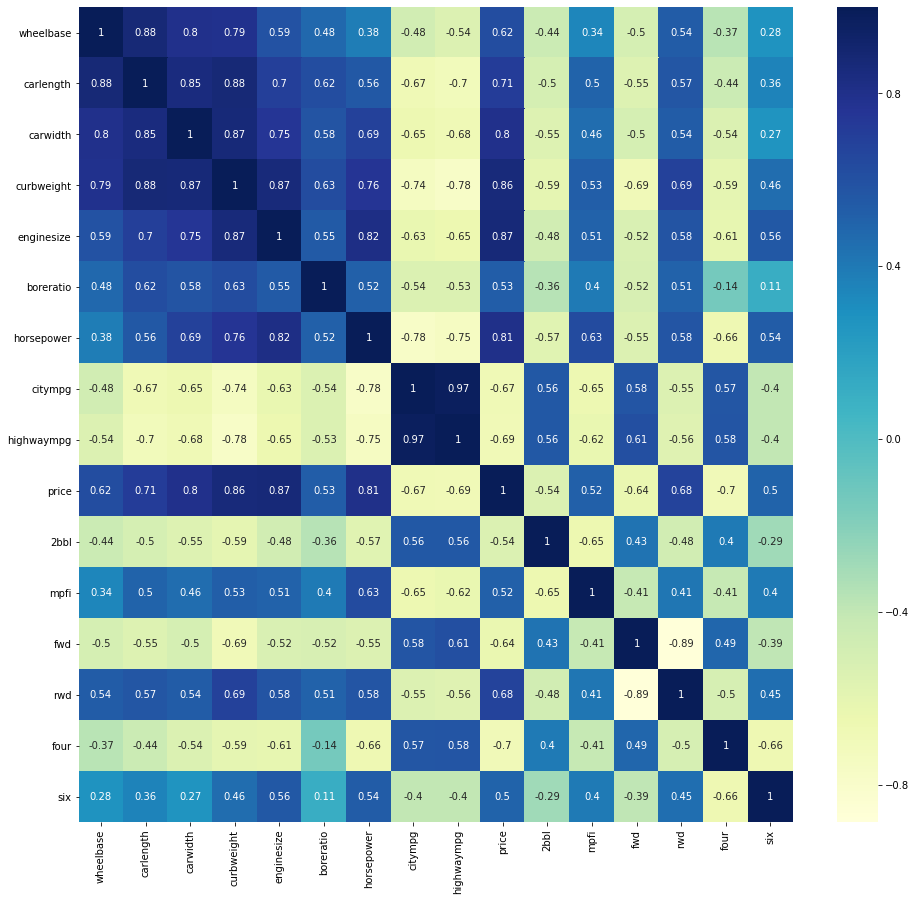

In [354]:
plt.figure(figsize = (16, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### Dividing into X and Y sets for the model building

In [355]:
df_train_onebyone = df_train
y_train_onebyone = df_train_onebyone.pop('price')
X_train = df_train_onebyone

In [356]:
df_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', '2bbl', 'mpfi',
       'fwd', 'rwd', 'four', 'six'],
      dtype='object')

In [357]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', '2bbl', 'mpfi',
       'fwd', 'rwd', 'four', 'six'],
      dtype='object')

### Model: Linear Model Building -  Adding one variable at a time 

In [462]:
import statsmodels.api as sm 

In [359]:
X_train_lm = sm.add_constant(X_train[['enginesize']])
lr = sm.OLS(y_train, X_train_lm).fit()

In [360]:
lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

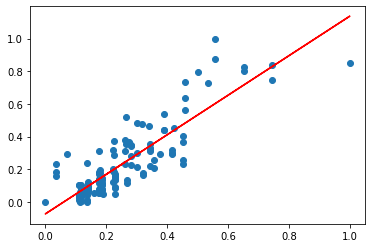

In [361]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.073 + 1.21*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [362]:
print(lr.summary())
# Observation : Engine Size varaible seems to be a good predictor variable
#providing good R - square and Adjusted R square.

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.09e-44
Time:                        10:24:29   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

In [363]:
#### Adding another feature to improvise the predictability of dependent variable Y.

In [364]:
X_train_lm = X_train[['enginesize','highwaympg']]

In [365]:
#build model

In [366]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const         0.068631
enginesize    1.013374
highwaympg   -0.250417
dtype: float64

In [367]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     249.9
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           6.45e-47
Time:                        10:24:32   Log-Likelihood:                 125.59
No. Observations:                 143   AIC:                            -245.2
Df Residuals:                     140   BIC:                            -236.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0686      0.037      1.853      0.066      -0.005       0.142
enginesize     1.0134      0.072     14.020      0.000       0.870       1.156
highwaympg    -0.2504      0.059     -4.223      0.000      -0.368      -0.133
==============================================================================
Omnibus:                       19.839   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.279
Skew:                           0.750   Prob(JB):                     7.23e-07
Kurtosis:                       4.580   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p values are within the 0.05  , Rsqared and Adjusted R squared values are improvised

####  Adding another Feature 

In [368]:
X_train_lm = X_train[['enginesize','highwaympg','fwd']]

In [369]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr2 = sm.OLS(y_train, X_train_lm).fit()
lr2.params

const         0.095512
enginesize    0.951165
highwaympg   -0.142490
fwd          -0.088049
dtype: float64

In [370]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.47e-49
Time:                        10:24:36   Log-Likelihood:                 133.94
No. Observations:                 143   AIC:                            -259.9
Df Residuals:                     139   BIC:                            -248.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0955      0.036      2.678      0.0

#### Add another Feature

In [371]:
X_train_lm = X_train[['enginesize','highwaympg','fwd','four']]

In [372]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr3 = sm.OLS(y_train, X_train_lm).fit()
lr3.params

const         0.163554
enginesize    0.847950
highwaympg   -0.088883
fwd          -0.076459
four         -0.094599
dtype: float64

In [373]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     163.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.27e-51
Time:                        10:24:41   Log-Likelihood:                 141.99
No. Observations:                 143   AIC:                            -274.0
Df Residuals:                     138   BIC:                            -259.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1636      0.038      4.331      0.0

#### observation : The highwaympg  p value is increased to .142 so drop it.

###### Adding New Feature :  six (Cylinder_number)

In [374]:
X_train_lm = X_train[['enginesize','four','fwd','six']]

In [375]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr4 = sm.OLS(y_train, X_train_lm).fit()
lr4.params


const         0.159700
enginesize    0.933175
four         -0.136582
fwd          -0.088659
six          -0.087840
dtype: float64

In [376]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     172.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.19e-52
Time:                        10:24:45   Log-Likelihood:                 145.05
No. Observations:                 143   AIC:                            -280.1
Df Residuals:                     138   BIC:                            -265.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1597      0.032      4.929      0.0

#### Add Another Feature 2bbl

In [377]:
X_train_lm = X_train[['enginesize','four','fwd','six','2bbl']]

In [378]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr5 = sm.OLS(y_train, X_train_lm).fit()
lr5.params

const         0.172027
enginesize    0.896129
four         -0.130128
fwd          -0.080372
six          -0.083903
2bbl         -0.038950
dtype: float64

In [379]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.79e-52
Time:                        10:24:48   Log-Likelihood:                 147.40
No. Observations:                 143   AIC:                            -282.8
Df Residuals:                     137   BIC:                            -265.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1720      0.033      5.293      0.0

#### Add another feature boreratio

In [380]:
X_train_lm = X_train_lm = X_train[['enginesize','four','fwd','six','2bbl','boreratio']]

In [381]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr6 = sm.OLS(y_train, X_train_lm).fit()
lr6.params


const         0.149063
enginesize    0.836311
four         -0.141975
fwd          -0.067988
six          -0.075589
2bbl         -0.036062
boreratio     0.073716
dtype: float64

In [382]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     120.1
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           7.82e-52
Time:                        10:24:50   Log-Likelihood:                 148.52
No. Observations:                 143   AIC:                            -283.0
Df Residuals:                     136   BIC:                            -262.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1491      0.036      4.143      0.0

#### observation : the p value of boreratio is high so drop it,  add another feature variable

In [383]:
X_train_lm = X_train_lm = X_train[['enginesize','four','fwd','2bbl','mpfi']]

In [384]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr7 = sm.OLS(y_train, X_train_lm).fit()
lr7.params

const         0.150477
enginesize    0.851256
four         -0.097124
fwd          -0.079139
2bbl         -0.044480
mpfi         -0.004613
dtype: float64

In [385]:
print (lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     133.4
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           7.46e-51
Time:                        10:24:52   Log-Likelihood:                 143.49
No. Observations:                 143   AIC:                            -275.0
Df Residuals:                     137   BIC:                            -257.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1505      0.034      4.396      0.0

#### mpfi coefficent  is very low and P value is very high  so drop , add another feature

In [386]:
 X_train_lm = X_train[['enginesize','four','fwd','2bbl','six']]

In [387]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr7 = sm.OLS(y_train, X_train_lm).fit()
lr7.params

const         0.172027
enginesize    0.896129
four         -0.130128
fwd          -0.080372
2bbl         -0.038950
six          -0.083903
dtype: float64

In [388]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     142.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.79e-52
Time:                        10:24:54   Log-Likelihood:                 147.40
No. Observations:                 143   AIC:                            -282.8
Df Residuals:                     137   BIC:                            -265.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1720      0.033      5.293      0.0

####  Add another feature variable

In [389]:
X_train_lm = X_train[['enginesize','four','fwd','2bbl','six','rwd',]]

In [390]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr8 = sm.OLS(y_train, X_train_lm).fit()
lr8.params

const         0.129463
enginesize    0.876449
four         -0.131659
fwd          -0.035307
2bbl         -0.034140
six          -0.090275
rwd           0.059565
dtype: float64

In [391]:
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     120.7
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.69e-52
Time:                        10:24:57   Log-Likelihood:                 148.85
No. Observations:                 143   AIC:                            -283.7
Df Residuals:                     136   BIC:                            -263.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1295      0.041      3.148      0.0

In [392]:
# drop fwd as p value is high 
X_train_lm = X_train[['enginesize','four','2bbl','six','rwd']]

In [393]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr9 = sm.OLS(y_train, X_train_lm).fit()
lr9.params

const         0.100375
enginesize    0.876058
four         -0.135189
2bbl         -0.033879
six          -0.093122
rwd           0.091305
dtype: float64

In [394]:
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           7.99e-53
Time:                        10:24:59   Log-Likelihood:                 148.24
No. Observations:                 143   AIC:                            -284.5
Df Residuals:                     137   BIC:                            -266.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1004      0.031      3.228      0.0

In [395]:
# drop 2bbl as p value is high 
X_train_lm = X_train[['enginesize','four','six','rwd']]

In [396]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_lm)
lr10 = sm.OLS(y_train, X_train_lm).fit()
lr10.params

const         0.083178
enginesize    0.904081
four         -0.140851
six          -0.097505
rwd           0.100937
dtype: float64

In [460]:
X_train_onebyone = X_train_lm.drop(['const'],axis =1) 
X_train_onebyone

enginesize  four  six  rwd
122    0.139623     1    0    0
125    0.339623     1    0    1
166    0.139623     1    0    1
1      0.260377     1    0    1
199    0.260377     1    0    1
190    0.181132     1    0    0
96     0.135849     1    0    0
177    0.230189     1    0    0
181    0.377358     0    1    1
97     0.135849     1    0    0
120    0.109434     1    0    0
117    0.275472     1    0    1
57     0.033962     0    0    1
44     0.109434     1    0    0
153    0.116981     1    0    0
85     0.230189     1    0    0
127    0.501887     0    1    1
151    0.116981     1    0    0
204    0.301887     1    0    1
10     0.177358     1    0    1
20     0.109434     1    0    0
170    0.320755     1    0    1
82     0.358491     1    0    0
12     0.388679     0    1    1
16     0.558491     0    1    1
178    0.415094     0    1    1
90     0.158491     1    0    0
89     0.135849     1    0    0
45     0.109434     1    0    0
161    0.139623     1    0    0
116    0.343396     1    0    1
189    0.181132     1    0    0
192    0.135849     1    0    0
148    0.177358     1    0    0
51     0.113208     1    0    0
175    0.230189     1    0    0
39     0.184906     1    0    0
163    0.139623     1    0    1
37     0.184906     1    0    0
6      0.283019     0    0    0
54     0.113208     1    0    0
25     0.109434     1    0    0
21     0.109434     1    0    0
48     0.743396     0    1    1
9      0.264151     0    0    0
23     0.139623     1    0    0
35     0.116981     1    0    0
112    0.343396     1    0    1
50     0.113208     1    0    0
62     0.230189     1    0    0
145    0.177358     1    0    0
146    0.177358     1    0    0
19     0.109434     1    0    0
194    0.301887     1    0    1
55     0.033962     0    0    1
142    0.177358     1    0    0
22     0.109434     1    0    0
42     0.184906     1    0    0
102    0.452830     0    1    0
185    0.181132     1    0    0
33     0.116981     1    0    0
76     0.116981     1    0    0
119    0.139623     1    0    0
179    0.415094     0    1    1
114    0.343396     1    0    1
95     0.135849     1    0    0
84     0.358491     1    0    0
196    0.301887     1    0    1
154    0.116981     1    0    0
71     0.652830     0    0    1
5      0.283019     0    0    0
36     0.116981     1    0    0
43     0.188679     1    0    1
162    0.139623     1    0    0
183    0.181132     1    0    0
139    0.177358     1    0    0
70     0.460377     0    0    1
131    0.267925     1    0    0
149    0.177358     1    0    0
150    0.116981     1    0    0
0      0.260377     1    0    1
78     0.116981     1    0    0
171    0.320755     1    0    1
68     0.460377     0    0    1
193    0.181132     1    0    0
152    0.116981     1    0    0
30     0.116981     1    0    0
106    0.452830     0    1    1
13     0.388679     0    1    1
72     0.652830     0    0    1
17     0.558491     0    1    1
18     0.000000     0    0    0
38     0.184906     1    0    0
109    0.222642     1    0    1
47     0.743396     0    1    1
113    0.222642     1    0    1
56     0.033962     0    0    1
27     0.139623     1    0    0
63     0.230189     1    0    0
147    0.177358     1    0    0
105    0.452830     0    1    1
121    0.109434     1    0    0
2      0.343396     0    1    1
80     0.184906     1    0    0
191    0.283019     0    0    0
61     0.230189     1    0    0
49     1.000000     0    0    1
135    0.226415     1    0    0
202    0.422642     0    1    1
91     0.135849     1    0    0
4      0.283019     0    0    0
100    0.222642     1    0    0
141    0.177358     1    0    0
129    0.535849     0    0    1
159    0.184906     1    0    0
132    0.226415     1    0    0
108    0.343396     1    0    1
155    0.116981     1    0    0
130    0.267925     1    0    0
86     0.230189     1    0    0
93     0.135849     1    0    0
137    0.226415     1    0    0
144    0.177358     1    0    0
58     0.071698     0    0    1
60   

In [398]:
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.02e-53
Time:                        10:25:04   Log-Likelihood:                 146.48
No. Observations:                 143   AIC:                            -283.0
Df Residuals:                     138   BIC:                            -268.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0832      0.030      2.779      0.0

In [461]:
vif = pd.DataFrame()
vif['Features'] = X_train_onebyone.columns
vif['VIF'] = [variance_inflation_factor(X_train_onebyone.values, i) for i in range(X_train_onebyone.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  enginesize  4.31
3         rwd  2.44
2         six  2.04
1        four  1.94

 #### Residual Analysis of the train data

In [399]:
y_train_price_onebyone = lr10.predict(X_train_lm)

Text(0.5, 0, 'Errors')

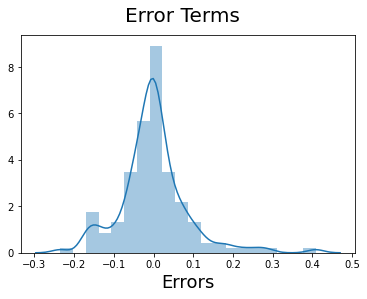

In [839]:
fig = plt.figure()
sns.distplot((y_train - y_train_price_onebyone), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### Making Predictions Using the Final Model

In [400]:
df_test.columns


Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price', 'hardtop', 'hatchback', 'sedan',
       'wagon', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'fwd',
       'rwd', 'dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'audi', 'bmw',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'eight',
       'five', 'four', 'six', 'three', 'two', '6_safe', '5_safe', '4_safe',
       '3_safe', '2_safe'],
      dtype='object')

In [432]:
df_test_onebyone = df_test


Index(['fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'fwd', 'rwd',
       'dohc', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'eight', 'five',
       'four', 'six', 'three', 'two', '6_safe', '5_safe', '4_safe', '3_safe',
       '2_safe'],
      dtype='object')

#### Scaling the Test data set 

In [404]:
df_test_onebyone[num_vars] = scaler.transform(df_test_onebyone[num_vars])

In [438]:
df_test_onebyone.describe()

fueltype  aspiration  doornumber  enginelocation  wheelbase  \
count  62.000000   62.000000   62.000000       62.000000  62.000000   
mean    0.887097    0.822581    0.564516        0.967742   0.437764   
std     0.319058    0.385142    0.499868        0.178127   0.212861   
min     0.000000    0.000000    0.000000        0.000000   0.000000   
25%     1.000000    1.000000    0.000000        1.000000   0.313793   
50%     1.000000    1.000000    1.000000        1.000000   0.387931   
75%     1.000000    1.000000    1.000000        1.000000   0.570690   
max     1.000000    1.000000    1.000000        1.000000   1.182759   

       carlength   carwidth  carheight  curbweight  enginesize  boreratio  \
count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   
mean    0.559481   0.480376   0.559663    0.428470    0.265673   0.556580   
std     0.189947   0.165440   0.215811    0.179488    0.162820   0.228484   
min     0.056911   0.183333   0.141593    0.128394    0.067925  -0.111111   
25%     0.459350   0.358333   0.384956    0.305275    0.177358   0.404762   
50%     0.547967   0.441667   0.588496    0.406129    0.226415   0.563492   
75%     0.719919   0.516667   0.699115    0.564876    0.316038   0.746032   
max     1.089431   0.975000   1.061947    0.935609    0.932075   0.888889   

          stroke  compressionratio  horsepower    peakrpm    citympg  \
count  62.000000         62.000000   62.000000  62.000000  62.000000   
mean    0.544314          0.209375    0.248858   0.393351   0.328405   
std     0.160738          0.273690    0.163376   0.192092   0.172009   
min    -0.060606          0.000000    0.016667   0.000000   0.027778   
25%     0.484848          0.093750    0.107292   0.265306   0.166667   
50%     0.585859          0.125000    0.218750   0.346939   0.305556   
75%     0.641414          0.150000    0.295833   0.540816   0.444444   
max     0.863636          1.000000    0.662500   1.000000   0.694444   

       highwaympg    hardtop  hatchback      sedan      wagon       1bbl  \
count   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean     0.363993   0.080645   0.338710   0.451613   0.096774   0.048387   
std      0.181845   0.274512   0.477134   0.501716   0.298064   0.216335   
min     -0.027027   0.000000   0.000000   0.000000   0.000000   0.000000   
25%      0.216216   0.000000   0.000000   0.000000   0.000000   0.000000   
50%      0.351351   0.000000   0.000000   0.000000   0.000000   0.000000   
75%      0.459459   0.000000   1.000000   1.000000   0.000000   0.000000   
max      0.810811   1.000000   1.000000   1.000000   1.000000   1.000000   

            2bbl  4bbl        idi        mfi       mpfi       spdi        fwd  \
count  62.000000  62.0  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.258065   0.0   0.112903   0.016129   0.500000   0.048387   0.564516   
std     0.441142   0.0   0.319058   0.127000   0.504082   0.216335   0.499868   
min     0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.0   0.000000   0.000000   0.500000   0.000000   1.000000   
75%     0.750000   0.0   0.000000   0.000000   1.000000   0.000000   1.000000   
max     1.000000   0.0   1.000000   1.000000   1.000000   1.000000   1.000000   

             rwd       dohc          l        ohc       ohcf       ohcv  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.419355   0.032258   0.048387   0.806452   0.048387   0.064516   
std     0.497482   0.178127   0.216335   0.398304   0.216335   0.247676   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   1.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   1.000000   0.000000   0.000000   
75%     1.000000   0.000000   0.000000   1.000000   0.000000   0.000000   
max     1.

In [448]:
# y_test_onebyone = df_test_onebyone.pop('price')
# y_test=df_test_onebyone.pop('price')
X_test_onebyone=df_test_onebyone
# X_test_onebyone = df_test_onebyone

In [449]:
X_test_onebyone = X_test_onebyone[X_train_onebyone.columns]


In [458]:

X_test_onebyone = sm.add_constant(X_test_onebyone)



In [453]:
y_pred_onebyone = lr10.predict(X_test_onebyone)

#### Model Evaluation :

Text(0, 0.5, 'y_pred_onebyone')

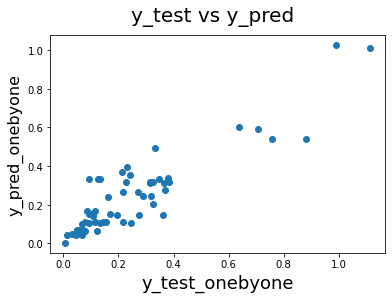

In [455]:
fig = plt.figure()
plt.scatter(y_test, y_pred_onebyone)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test_onebyone', fontsize = 18)                          # X-label
plt.ylabel('y_pred_onebyone', fontsize = 16)

Text(0, 0.5, 'Car Price')

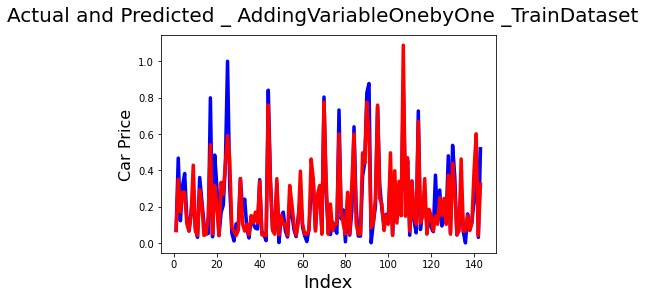

In [418]:

# train data set 


c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_train_price_onebyone, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted _ AddingVariableOnebyOne _TrainDataset', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Text(0, 0.5, 'Car Price')

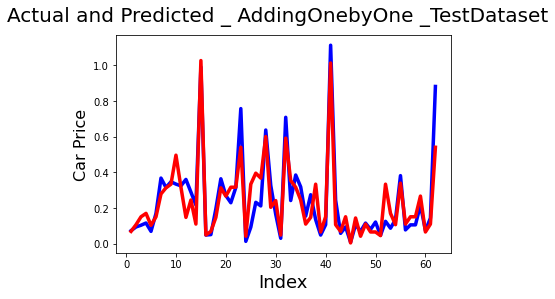

In [420]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test_onebyone, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_pred_onebyone, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted _ AddingOnebyOne _TestDataset', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 0.007547112772368904
r_square_value : 0.8366191219148544


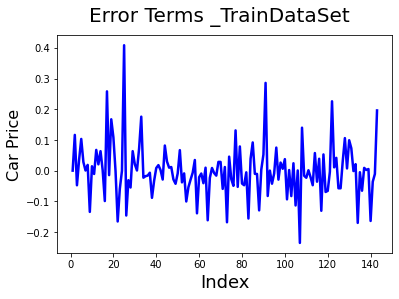

In [424]:
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train-y_train_price_onebyone, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms _TrainDataSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_price_onebyone)
r_squared = r2_score(y_train, y_train_price_onebyone)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.009781066061498677
r_square_value : 0.8169992688802161


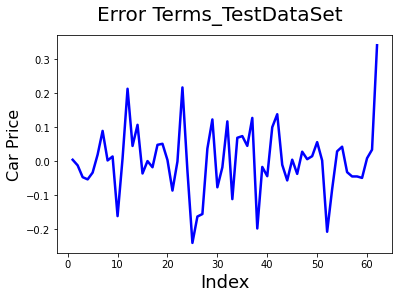

In [425]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test_onebyone-y_pred_onebyone, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms_TestDataSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_onebyone)
r_squared = r2_score(y_test, y_pred_onebyone)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

###  Building Linear Model -  Adding all variables 

In [545]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cardf, train_size = 0.7, test_size = 0.3, random_state = 100)



In [546]:


### Rescaling:  Features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Rescale numerical columns
num_vars = ['wheelbase','carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price' ]



In [547]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.describe()
#observation : Numerical Col values are between 0 and 1 



fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.818182    0.559441        0.993007    0.411141   
std      0.288490    0.387050    0.498199        0.083624    0.205581   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.272414   
50%      1.000000    1.000000    1.000000        1.000000    0.341379   
75%      1.000000    1.000000    1.000000        1.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

        carlength    carwidth   carheight  curbweight  enginesize   boreratio  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.525476    0.461655    0.509004    0.407878    0.241351    0.497946   
std      0.204848    0.184517    0.215378    0.211269    0.154619    0.207140   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.399187    0.304167    0.353982    0.245539    0.135849    0.305556   
50%      0.502439    0.425000    0.522124    0.355702    0.184906    0.500000   
75%      0.669919    0.550000    0.668142    0.559542    0.301887    0.682540   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           stroke  compressionratio  horsepower     peakrpm     citympg  \
count  143.000000        143.000000  143.000000  143.000000  143.000000   
mean     0.535389          0.190787    0.227302    0.400029    0.344211   
std      0.157843          0.237181    0.165511    0.196438    0.186165   
min      0.000000          0.000000    0.000000    0.000000    0.000000   
25%      0.464646          0.100000    0.091667    0.265306    0.166667   
50%      0.545455          0.125000    0.191667    0.428571    0.333333   
75%      0.611111          0.150000    0.283333    0.551020    0.500000   
max      1.000000          1.000000    1.000000    1.000000    1.000000   

       highwaympg       price     hardtop   hatchback       sedan       wagon  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.374976    0.219310    0.020979    0.342657    0.475524    0.132867   
std      0.188477    0.215682    0.143818    0.476266    0.501156    0.340624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.216216    0.067298    0.000000    0.000000    0.000000    0.000000   
50%      0.378378    0.140343    0.000000    0.000000    0.000000    0.000000   
75%      0.527027    0.313479    0.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             1bbl        2bbl        4bbl         idi    mfi        mpfi  \
count  143.000000  143.000000  143.000000  143.000000  143.0  143.000000   
mean     0.055944    0.349650    0.020979    0.090909    0.0    0.440559   
std      0.230621    0.478536    0.143818    0.288490    0.0    0.498199   
min      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
75%      0.000000    1.000000    0.000000    0.000000    0.0    1.000000   
max      1.000000    1.000000    1.000000    1.000000    0.0    1.000000   

             spdi         fwd         rwd        dohc           l         ohc  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.041958    0.594406    0.349650    0.069930    0.062937    0.685315   
std      0.201198    0.492733    0.478536    0.255926    0.243703    0.466023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000   

In [548]:
df_train.drop(['mercury','mfi'], axis = 1, inplace = True)

In [549]:



# dropping cols which are nearly neutral to price Value.

cols_to_drop=df_train.corr()[(df_train.corr()['price']<=0.5) & (df_train.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
df_train.drop(cols_to_drop,axis=1,inplace=True)
df_train.columns




Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'citympg', 'highwaympg', 'price', '2bbl',
       'mpfi', 'fwd', 'rwd', 'four', 'six'],
      dtype='object')

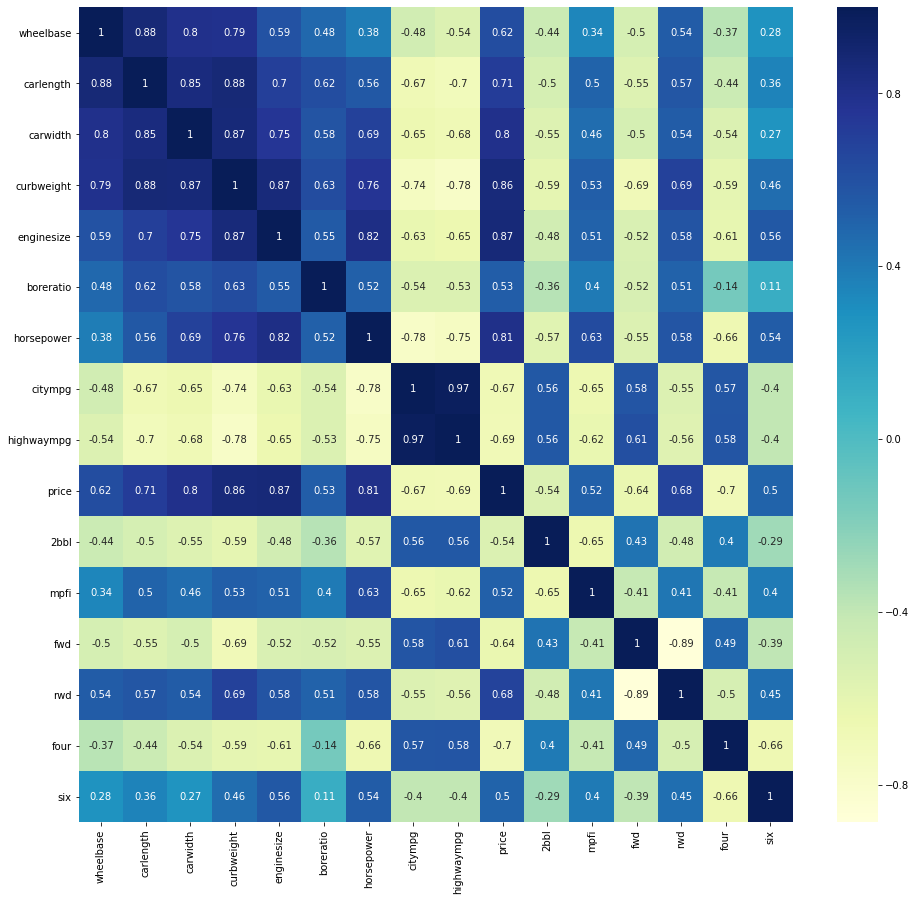

In [550]:
plt.figure(figsize = (16, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()



In [551]:
##### Dividing into X and Y sets for the model building
y_train_all = df_train.pop('price')
X_train = df_train


In [552]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const        -0.028681
wheelbase     0.026697
carlength    -0.027792
carwidth      0.205447
curbweight    0.101261
enginesize    0.550796
boreratio     0.010555
horsepower    0.152681
citympg      -0.083389
highwaympg    0.139472
2bbl         -0.004214
mpfi          0.003946
fwd          -0.026792
rwd           0.047922
four         -0.102539
six          -0.045967
dtype: float64

In [553]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     51.91
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.03e-46
Time:                        13:06:26   Log-Likelihood:                 157.40
No. Observations:                 143   AIC:                            -282.8
Df Residuals:                     127   BIC:                            -235.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0287      0.072     -0.396      0.6

In [554]:
X_train_new = X_train.drop(['mpfi'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

lr_2.params

const        -0.025145
wheelbase     0.027130
carlength    -0.023547
carwidth      0.203973
curbweight    0.094260
enginesize    0.553960
boreratio     0.010634
horsepower    0.156400
citympg      -0.088502
highwaympg    0.141660
2bbl         -0.006140
fwd          -0.027913
rwd           0.046981
four         -0.102247
six          -0.045430
dtype: float64

In [555]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     56.04
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.37e-47
Time:                        13:06:50   Log-Likelihood:                 157.39
No. Observations:                 143   AIC:                            -284.8
Df Residuals:                     128   BIC:                            -240.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0251      0.069     -0.365      0.7

In [556]:
X_train_new = X_train_new.drop(['boreratio'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

lr_3.params

const        -0.024092
wheelbase     0.025336
carlength    -0.019029
carwidth      0.206193
curbweight    0.093178
enginesize    0.557579
horsepower    0.158868
citympg      -0.092800
highwaympg    0.144750
2bbl         -0.005925
fwd          -0.029191
rwd           0.047274
four         -0.100097
six          -0.046198
dtype: float64

In [557]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     60.80
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.75e-48
Time:                        13:06:52   Log-Likelihood:                 157.37
No. Observations:                 143   AIC:                            -286.7
Df Residuals:                     129   BIC:                            -245.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0241      0.068     -0.352      0.7

In [558]:
X_train_new = X_train_new.drop(['carlength'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.params

const        -0.027009
wheelbase     0.017754
carwidth      0.201969
curbweight    0.084977
enginesize    0.557738
horsepower    0.162801
citympg      -0.082859
highwaympg    0.139582
2bbl         -0.006191
fwd          -0.029446
rwd           0.047436
four         -0.101115
six          -0.047276
dtype: float64

In [559]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     66.36
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.13e-49
Time:                        13:06:54   Log-Likelihood:                 157.35
No. Observations:                 143   AIC:                            -288.7
Df Residuals:                     130   BIC:                            -250.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0270      0.066     -0.408      0.6

In [560]:
X_train_new = X_train_new.drop(['wheelbase'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.params

const        -0.028747
carwidth      0.213577
curbweight    0.097606
enginesize    0.553640
horsepower    0.151818
citympg      -0.076707
highwaympg    0.132867
2bbl         -0.006100
fwd          -0.028132
rwd           0.049117
four         -0.100127
six          -0.045173
dtype: float64

In [561]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     72.92
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.48e-50
Time:                        13:07:08   Log-Likelihood:                 157.32
No. Observations:                 143   AIC:                            -290.6
Df Residuals:                     131   BIC:                            -255.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0287      0.065     -0.439      0.6

In [562]:
X_train_new = X_train_new.drop(['2bbl'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.params

const        -0.035325
carwidth      0.214557
curbweight    0.105442
enginesize    0.544751
horsepower    0.158853
citympg      -0.075641
highwaympg    0.130354
fwd          -0.026302
rwd           0.051078
four         -0.099960
six          -0.045013
dtype: float64

In [563]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     80.75
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.81e-51
Time:                        13:07:13   Log-Likelihood:                 157.27
No. Observations:                 143   AIC:                            -292.5
Df Residuals:                     132   BIC:                            -260.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0353      0.062     -0.572      0.5

In [564]:
X_train_new = X_train_new.drop(['citympg'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.params

const        -0.039125
carwidth      0.213076
curbweight    0.105432
enginesize    0.534781
horsepower    0.176149
highwaympg    0.060597
fwd          -0.023458
rwd           0.053316
four         -0.099195
six          -0.044682
dtype: float64

In [565]:
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     90.28
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.11e-52
Time:                        13:07:15   Log-Likelihood:                 157.19
No. Observations:                 143   AIC:                            -294.4
Df Residuals:                     133   BIC:                            -264.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0391      0.061     -0.644      0.5

In [566]:
X_train_new = X_train_new.drop(['fwd'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.params

const        -0.054804
carwidth      0.194290
curbweight    0.135511
enginesize    0.516827
horsepower    0.177659
highwaympg    0.054637
rwd           0.071179
four         -0.101262
six          -0.047311
dtype: float64

In [567]:
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.9
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.69e-53
Time:                        13:07:16   Log-Likelihood:                 156.95
No. Observations:                 143   AIC:                            -295.9
Df Residuals:                     134   BIC:                            -269.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0548      0.056     -0.982      0.3

In [568]:
X_train_new = X_train_new.drop(['highwaympg'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_9 = sm.OLS(y_train, X_train_lm).fit()

lr_9.params

const        -0.022142
carwidth      0.199471
curbweight    0.094100
enginesize    0.548077
horsepower    0.144914
rwd           0.072042
four         -0.098854
six          -0.046268
dtype: float64

In [569]:
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     116.7
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           4.46e-54
Time:                        13:07:18   Log-Likelihood:                 156.62
No. Observations:                 143   AIC:                            -297.2
Df Residuals:                     135   BIC:                            -273.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0221      0.037     -0.595      0.5

In [570]:
X_train_new = X_train_new.drop(['curbweight'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_10 = sm.OLS(y_train, X_train_lm).fit()

lr_10.params

const        -0.023778
carwidth      0.251864
enginesize    0.596065
horsepower    0.144992
rwd           0.080462
four         -0.097563
six          -0.043802
dtype: float64

In [571]:
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     136.2
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.69e-55
Time:                        13:07:20   Log-Likelihood:                 156.15
No. Observations:                 143   AIC:                            -298.3
Df Residuals:                     136   BIC:                            -277.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0238      0.037     -0.639      0.5

In [574]:
X_train_new = X_train_new.drop(['horsepower'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_11 = sm.OLS(y_train, X_train_lm).fit()

lr_11.params

const        -0.010529
carwidth      0.265541
enginesize    0.680750
rwd           0.084744
four         -0.109334
six          -0.042418
dtype: float64

In [576]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [577]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features    VIF
0    carwidth  13.08
1  enginesize  12.01
3        four   2.69
2         rwd   2.58
4         six   2.12

In [575]:
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     160.1
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.15e-55
Time:                        13:07:58   Log-Likelihood:                 154.44
No. Observations:                 143   AIC:                            -296.9
Df Residuals:                     137   BIC:                            -279.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.037     -0.286      0.7

In [595]:
X_train_new = X_train_new.drop(['carwidth'],axis =1)
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

lr_12 = sm.OLS(y_train, X_train_lm).fit()

lr_12.params

const         0.083178
enginesize    0.904081
rwd           0.100937
four         -0.140851
six          -0.097505
dtype: float64

In [613]:
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     176.7
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.02e-53
Time:                        13:25:21   Log-Likelihood:                 146.48
No. Observations:                 143   AIC:                            -283.0
Df Residuals:                     138   BIC:                            -268.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0832      0.030      2.779      0.0

In [596]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [597]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
0  enginesize  4.31
1         rwd  2.44
3         six  2.04
2        four  1.94

#### Residual Analysis of the train data 

In [598]:
y_train_price = lr_12.predict(X_train_lm)

Text(0.5, 0, 'Errors')

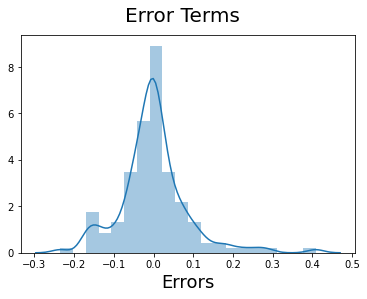

In [603]:
fig = plt.figure()
sns.distplot((y_train_all - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

#### Making Predictions using the Final model ( Method :All variables added )

In [584]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          62 non-null     int64  
 1   aspiration        62 non-null     int64  
 2   doornumber        62 non-null     int64  
 3   enginelocation    62 non-null     int64  
 4   wheelbase         62 non-null     float64
 5   carlength         62 non-null     float64
 6   carwidth          62 non-null     float64
 7   carheight         62 non-null     float64
 8   curbweight        62 non-null     int64  
 9   enginesize        62 non-null     int64  
 10  boreratio         62 non-null     float64
 11  stroke            62 non-null     float64
 12  compressionratio  62 non-null     float64
 13  horsepower        62 non-null     int64  
 14  peakrpm           62 non-null     int64  
 15  citympg           62 non-null     int64  
 16  highwaympg        62 non-null     int64  
 

In [585]:
df_test.describe()

fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  62.000000   62.000000   62.000000       62.000000   62.000000   
mean    0.887097    0.822581    0.564516        0.967742   99.295161   
std     0.319058    0.385142    0.499868        0.178127    6.172983   
min     0.000000    0.000000    0.000000        0.000000   86.600000   
25%     1.000000    1.000000    0.000000        1.000000   95.700000   
50%     1.000000    1.000000    1.000000        1.000000   97.850000   
75%     1.000000    1.000000    1.000000        1.000000  103.150000   
max     1.000000    1.000000    1.000000        1.000000  120.900000   

        carlength   carwidth  carheight   curbweight  enginesize  boreratio  \
count   62.000000  62.000000  62.000000    62.000000   62.000000  62.000000   
mean   175.508065  66.064516  54.124194  2592.596774  131.403226   3.381290   
std     11.681726   1.985282   2.438670   462.719100   43.147273   0.287889   
min    144.600000  62.500000  49.400000  1819.000000   79.000000   2.540000   
25%    169.350000  64.600000  52.150000  2275.000000  108.000000   3.190000   
50%    174.800000  65.600000  54.450000  2535.000000  121.000000   3.390000   
75%    185.375000  66.500000  55.700000  2944.250000  144.750000   3.620000   
max    208.100000  72.000000  59.800000  3900.000000  308.000000   3.800000   

          stroke  compressionratio  horsepower      peakrpm    citympg  \
count  62.000000         62.000000   62.000000    62.000000  62.000000   
mean    3.267742         10.350000  107.725806  5113.709677  24.822581   
std     0.318261          4.379039   39.210307   470.626488   6.192338   
min     2.070000          7.000000   52.000000  4150.000000  14.000000   
25%     3.150000          8.500000   73.750000  4800.000000  19.000000   
50%     3.350000          9.000000  100.500000  5000.000000  24.000000   
75%     3.460000          9.400000  119.000000  5475.000000  29.000000   
max     3.900000         23.000000  207.000000  6600.000000  38.000000   

       highwaympg         price    hardtop  hatchback      sedan      wagon  \
count   62.000000     62.000000  62.000000  62.000000  62.000000  62.000000   
mean    30.467742  13784.967742   0.080645   0.338710   0.451613   0.096774   
std      6.728256   8436.653035   0.274512   0.477134   0.501716   0.298064   
min     16.000000   5399.000000   0.000000   0.000000   0.000000   0.000000   
25%     25.000000   8460.500000   0.000000   0.000000   0.000000   0.000000   
50%     30.000000  10873.000000   0.000000   0.000000   0.000000   0.000000   
75%     34.000000  16601.250000   0.000000   1.000000   1.000000   0.000000   
max     47.000000  45400.000000   1.000000   1.000000   1.000000   1.000000   

            1bbl       2bbl  4bbl        idi        mfi       mpfi       spdi  \
count  62.000000  62.000000  62.0  62.000000  62.000000  62.000000  62.000000   
mean    0.048387   0.258065   0.0   0.112903   0.016129   0.500000   0.048387   
std     0.216335   0.441142   0.0   0.319058   0.127000   0.504082   0.216335   
min     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.0   0.000000   0.000000   0.500000   0.000000   
75%     0.000000   0.750000   0.0   0.000000   0.000000   1.000000   0.000000   
max     1.000000   1.000000   0.0   1.000000   1.000000   1.000000   1.000000   

             fwd        rwd       dohc          l        ohc       ohcf  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.564516   0.419355   0.032258   0.048387   0.806452   0.048387   
std     0.499868   0.497482   0.178127   0.216335   0.398304   0.216335   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
75%     1.000

#### Applying Scaling on the test data sets 

In [587]:
# df_test[['A','B']] = min_max_scaler.transform(df_test[['A','B']])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [588]:
df_test.describe()

fueltype  aspiration  doornumber  enginelocation  wheelbase  \
count  62.000000   62.000000   62.000000       62.000000  62.000000   
mean    0.887097    0.822581    0.564516        0.967742   0.437764   
std     0.319058    0.385142    0.499868        0.178127   0.212861   
min     0.000000    0.000000    0.000000        0.000000   0.000000   
25%     1.000000    1.000000    0.000000        1.000000   0.313793   
50%     1.000000    1.000000    1.000000        1.000000   0.387931   
75%     1.000000    1.000000    1.000000        1.000000   0.570690   
max     1.000000    1.000000    1.000000        1.000000   1.182759   

       carlength   carwidth  carheight  curbweight  enginesize  boreratio  \
count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   
mean    0.559481   0.480376   0.559663    0.428470    0.265673   0.556580   
std     0.189947   0.165440   0.215811    0.179488    0.162820   0.228484   
min     0.056911   0.183333   0.141593    0.128394    0.067925  -0.111111   
25%     0.459350   0.358333   0.384956    0.305275    0.177358   0.404762   
50%     0.547967   0.441667   0.588496    0.406129    0.226415   0.563492   
75%     0.719919   0.516667   0.699115    0.564876    0.316038   0.746032   
max     1.089431   0.975000   1.061947    0.935609    0.932075   0.888889   

          stroke  compressionratio  horsepower    peakrpm    citympg  \
count  62.000000         62.000000   62.000000  62.000000  62.000000   
mean    0.544314          0.209375    0.248858   0.393351   0.328405   
std     0.160738          0.273690    0.163376   0.192092   0.172009   
min    -0.060606          0.000000    0.016667   0.000000   0.027778   
25%     0.484848          0.093750    0.107292   0.265306   0.166667   
50%     0.585859          0.125000    0.218750   0.346939   0.305556   
75%     0.641414          0.150000    0.295833   0.540816   0.444444   
max     0.863636          1.000000    0.662500   1.000000   0.694444   

       highwaympg      price    hardtop  hatchback      sedan      wagon  \
count   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean     0.363993   0.239439   0.080645   0.338710   0.451613   0.096774   
std      0.181845   0.233076   0.274512   0.477134   0.501716   0.298064   
min     -0.027027   0.007763   0.000000   0.000000   0.000000   0.000000   
25%      0.216216   0.092342   0.000000   0.000000   0.000000   0.000000   
50%      0.351351   0.158991   0.000000   0.000000   0.000000   0.000000   
75%      0.459459   0.317243   0.000000   1.000000   1.000000   0.000000   
max      0.810811   1.112855   1.000000   1.000000   1.000000   1.000000   

            1bbl       2bbl  4bbl        idi        mfi       mpfi       spdi  \
count  62.000000  62.000000  62.0  62.000000  62.000000  62.000000  62.000000   
mean    0.048387   0.258065   0.0   0.112903   0.016129   0.500000   0.048387   
std     0.216335   0.441142   0.0   0.319058   0.127000   0.504082   0.216335   
min     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.0   0.000000   0.000000   0.500000   0.000000   
75%     0.000000   0.750000   0.0   0.000000   0.000000   1.000000   0.000000   
max     1.000000   1.000000   0.0   1.000000   1.000000   1.000000   1.000000   

             fwd        rwd       dohc          l        ohc       ohcf  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.564516   0.419355   0.032258   0.048387   0.806452   0.048387   
std     0.499868   0.497482   0.178127   0.216335   0.398304   0.216335   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
75%     1.000000   1.000000   0.000000   0.000000   1.000000   0.000000   
max     1.

In [589]:
y_test = df_test.pop('price')
X_test = df_test

In [590]:
X_test_m4 = X_test

In [591]:
X_test_m4 = X_test_m4[X_train_new.columns]
X_test_m4 = sm.add_constant(X_test_m4)


In [600]:
y_pred_m4 = lr_12.predict(X_test_m4)

#### Model Evaluation:

Text(0, 0.5, 'y_pred')

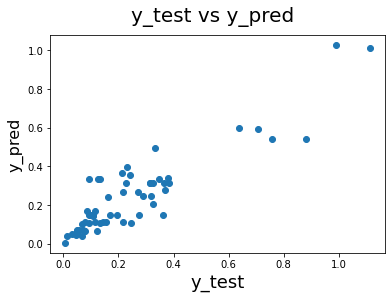

In [612]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

Text(0, 0.5, 'Car Price')

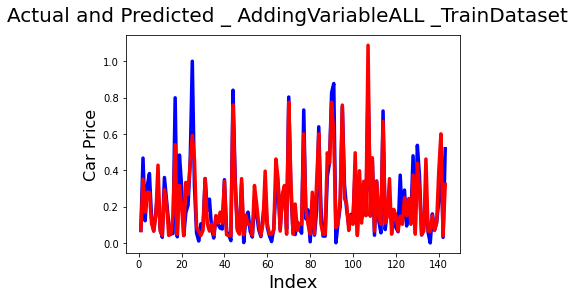

In [608]:
# train data Set .
c= [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train_all, color = "blue", linewidth = 3.5, linestyle = "-")
plt.plot(c,y_train_price, color = "red" , linewidth = 3.5 , linestyle = "-")
fig.suptitle('Actual and Predicted _ AddingVariableALL _TrainDataset', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)



Text(0, 0.5, 'Car Price')

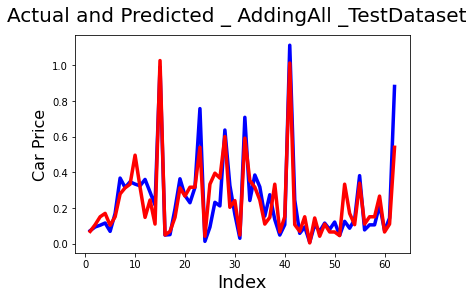

In [609]:
# Test data set. 
c= [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color = "blue", linewidth = 3.5, linestyle = "-")
plt.plot(c,y_pred_m4, color = "red" , linewidth = 3.5 , linestyle = "-")
fig.suptitle('Actual and Predicted _ AddingAll _TestDataset', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 0.007547112772368904
r_square_value : 0.8366191219148544


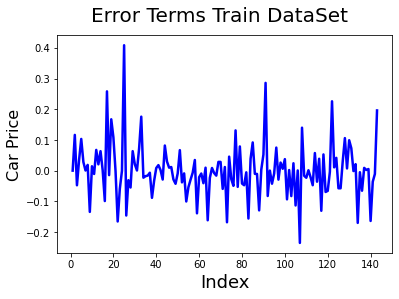

In [610]:

#train error : 
    # Error terms
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_train_all-y_train_price, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms Train DataSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_price)
r_squared = r2_score(y_train, y_train_price)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)


Mean_Squared_Error : 0.009781066061498679
r_square_value : 0.8169992688802161


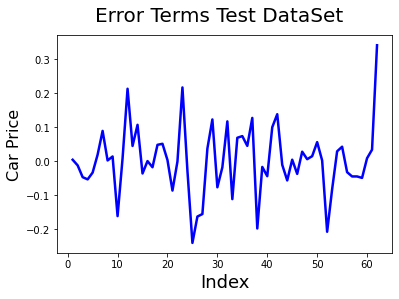

In [611]:
# Test data 
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred_m4, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms Test DataSet', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_m4)
r_squared = r2_score(y_test, y_pred_m4)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

### RFE MODEL :

In [104]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train_rfe, df_test_rfe = train_test_split(cardf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [106]:
num_vars = ['price','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','highwaympg','citympg' ]

In [107]:
df_train_rfe[num_vars] = scaler.fit_transform(df_train_rfe[num_vars])
df_train_rfe.describe()


fueltype  aspiration  doornumber  enginelocation   wheelbase  \
count  143.000000  143.000000  143.000000      143.000000  143.000000   
mean     0.909091    0.818182    0.559441        0.993007    0.411141   
std      0.288490    0.387050    0.498199        0.083624    0.205581   
min      0.000000    0.000000    0.000000        0.000000    0.000000   
25%      1.000000    1.000000    0.000000        1.000000    0.272414   
50%      1.000000    1.000000    1.000000        1.000000    0.341379   
75%      1.000000    1.000000    1.000000        1.000000    0.503448   
max      1.000000    1.000000    1.000000        1.000000    1.000000   

        carlength    carwidth   carheight  curbweight  enginesize   boreratio  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.525476    0.461655    0.509004    0.407878    0.241351    0.497946   
std      0.204848    0.184517    0.215378    0.211269    0.154619    0.207140   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.399187    0.304167    0.353982    0.245539    0.135849    0.305556   
50%      0.502439    0.425000    0.522124    0.355702    0.184906    0.500000   
75%      0.669919    0.550000    0.668142    0.559542    0.301887    0.682540   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           stroke  compressionratio  horsepower     peakrpm     citympg  \
count  143.000000        143.000000  143.000000  143.000000  143.000000   
mean     0.535389          0.190787    0.227302    0.400029    0.344211   
std      0.157843          0.237181    0.165511    0.196438    0.186165   
min      0.000000          0.000000    0.000000    0.000000    0.000000   
25%      0.464646          0.100000    0.091667    0.265306    0.166667   
50%      0.545455          0.125000    0.191667    0.428571    0.333333   
75%      0.611111          0.150000    0.283333    0.551020    0.500000   
max      1.000000          1.000000    1.000000    1.000000    1.000000   

       highwaympg       price     hardtop   hatchback       sedan       wagon  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.374976    0.219310    0.020979    0.342657    0.475524    0.132867   
std      0.188477    0.215682    0.143818    0.476266    0.501156    0.340624   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.216216    0.067298    0.000000    0.000000    0.000000    0.000000   
50%      0.378378    0.140343    0.000000    0.000000    0.000000    0.000000   
75%      0.527027    0.313479    0.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             1bbl        2bbl        4bbl         idi    mfi        mpfi  \
count  143.000000  143.000000  143.000000  143.000000  143.0  143.000000   
mean     0.055944    0.349650    0.020979    0.090909    0.0    0.440559   
std      0.230621    0.478536    0.143818    0.288490    0.0    0.498199   
min      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.0    0.000000   
75%      0.000000    1.000000    0.000000    0.000000    0.0    1.000000   
max      1.000000    1.000000    1.000000    1.000000    0.0    1.000000   

             spdi         fwd         rwd        dohc           l         ohc  \
count  143.000000  143.000000  143.000000  143.000000  143.000000  143.000000   
mean     0.041958    0.594406    0.349650    0.069930    0.062937    0.685315   
std      0.201198    0.492733    0.478536    0.255926    0.243703    0.466023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    1.000000    0.000000   

In [108]:
y_train = df_train_rfe.pop('price')
X_train = df_train_rfe

In [233]:
y_trainRFE  = y_train

In [110]:
lm = LinearRegression()
lm.fit(X_train,y_train)


rfe = RFE(lm , 15)
rfe = rfe.fit(X_train, y_train)

In [111]:
list (zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 7),
 ('aspiration', False, 29),
 ('doornumber', False, 50),
 ('enginelocation', True, 1),
 ('wheelbase', False, 18),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 19),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 9),
 ('horsepower', False, 37),
 ('peakrpm', False, 6),
 ('citympg', False, 36),
 ('highwaympg', False, 31),
 ('hardtop', False, 33),
 ('hatchback', False, 32),
 ('sedan', False, 34),
 ('wagon', False, 35),
 ('1bbl', False, 12),
 ('2bbl', False, 14),
 ('4bbl', False, 11),
 ('idi', False, 8),
 ('mfi', False, 53),
 ('mpfi', False, 13),
 ('spdi', False, 10),
 ('fwd', False, 52),
 ('rwd', False, 40),
 ('dohc', False, 28),
 ('l', True, 1),
 ('ohc', False, 27),
 ('ohcf', False, 23),
 ('ohcv', False, 25),
 ('rotor', True, 1),
 ('audi', False, 38),
 ('bmw', True, 1),
 ('buick', False, 43),
 ('chevrolet', False, 30),
 ('dodge', False, 21),
 ('honda', False

In [112]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'l', 'rotor', 'bmw', 'peugeot', 'eight', 'five', 'four', 'six', 'three',
       'two'],
      dtype='object')

In [95]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'hardtop', 'hatchback', 'sedan', 'wagon',
       '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'fwd', 'rwd',
       'dohc', 'ohc', 'ohcf', 'ohcv', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', '6_safe', '5_safe', '4_safe', '3_safe',
       '2_safe'],
      dtype='object')

#### Building model using statsmodel, for detaild stats


In [144]:
X_train_rfe = X_train[col]

In [145]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train_rfe)

In [150]:
lm_1rfe = sm.OLS(y_train,X_train_rfe).fit()

In [147]:
print(lm_1rfe.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              254.1
Date:                Wed, 03 Jun 2020   Prob (F-statistic):                    1.32e-85
Time:                        07:59:34   Log-Likelihood:                          200.01
No. Observations:                 143   AIC:                                     -374.0
Df Residuals:                     130   BIC:                                     -335.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [148]:
X_train = X_train.drop(['const'], axis = 1)

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
5                l     inf
6            rotor     inf
8          peugeot     inf
13           three     inf
14             two     inf
0   enginelocation  128.24
11            four   88.37
2       curbweight   48.86
1         carwidth   45.22
3       enginesize   31.06
4        boreratio   18.97
12             six   10.82
10            five    7.35
9            eight    2.90
7              bmw    1.36

In [153]:
# Drop 'l' col var for high VIF 
X_train_new = X_train_rfe.drop(["l"], axis = 1)
X_train_new.columns


Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'bmw', 'peugeot', 'eight', 'five', 'four', 'six', 'three',
       'two'],
      dtype='object')

In [155]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [156]:
lm_2rfe = sm.OLS(y_train,X_train_lm).fit()

In [157]:
print(lm_2rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     122.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           6.14e-66
Time:                        08:01:36   Log-Likelihood:                 202.36
No. Observations:                 143   AIC:                            -376.7
Df Residuals:                     129   BIC:                            -335.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2683      0.129      2.

In [162]:
# Drop 'six' col var
X_train_new = X_train_new.drop(["six"], axis = 1)


In [163]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [164]:
lm_3rfe = sm.OLS(y_train,X_train_lm).fit()

In [165]:
print(lm_3rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.35e-67
Time:                        08:13:48   Log-Likelihood:                 202.32
No. Observations:                 143   AIC:                            -378.6
Df Residuals:                     130   BIC:                            -340.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2953      0.069      4.

In [166]:
X_train_new.columns

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'bmw', 'peugeot', 'eight', 'five', 'four', 'three', 'two'],
      dtype='object')

In [137]:
# X_train_new = X_train_new.drop(['const'], axis = 1)

KeyError: "['const'] not found in axis"

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
5            rotor    inf
12             two    inf
0   enginelocation  51.86
2       curbweight  48.56
1         carwidth  45.21
3       enginesize  29.64
10            four  25.23
4        boreratio  17.81
9             five   2.33
7          peugeot   1.79
11           three   1.44
8            eight   1.40
6              bmw   1.36

In [168]:
# Considering that the rotor var VIF is high and highest of p value among all, drop rotor 
X_train_new = X_train_new.drop(["rotor"],axis = 1)

In [171]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_new)

In [172]:
lm_4rfe = sm.OLS(y_train, X_train_lm).fit()

In [173]:
print(lm_4rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.35e-67
Time:                        08:16:50   Log-Likelihood:                 202.32
No. Observations:                 143   AIC:                            -378.6
Df Residuals:                     130   BIC:                            -340.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2953      0.069      4.

In [174]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0   enginelocation  51.86
2       curbweight  48.56
1         carwidth  45.21
3       enginesize  29.64
9             four  25.23
4        boreratio  17.81
11             two   2.60
8             five   2.33
6          peugeot   1.79
10           three   1.44
7            eight   1.40
5              bmw   1.36

In [175]:
# drop Enginelocation for high VIF  
X_train_new = X_train_new.drop(["enginelocation"],axis = 1)

In [176]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_new)

In [177]:
lm_5rfe = sm.OLS(y_train, X_train_lm).fit()

In [178]:
print(lm_5rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     95.69
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           4.96e-57
Time:                        08:19:47   Log-Likelihood:                 174.33
No. Observations:                 143   AIC:                            -324.7
Df Residuals:                     131   BIC:                            -289.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1653      0.046     -3.628      0.0

In [179]:
# p value of Boreratio is 0.9 since it is insigniifcant we drop it 
X_train_new = X_train_new.drop(["boreratio"],axis = 1)

In [180]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_new)

In [181]:
lm_6rfe = sm.OLS(y_train, X_train_lm).fit()

In [182]:
print(lm_6rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     106.1
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           4.69e-58
Time:                        08:20:20   Log-Likelihood:                 174.32
No. Observations:                 143   AIC:                            -326.6
Df Residuals:                     132   BIC:                            -294.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1644      0.043     -3.794      0.0

In [183]:
X_train_new = X_train_new.drop(["four"],axis = 1)

In [184]:
import statsmodels.api as sm 
X_train_lm = sm.add_constant(X_train_new)

In [185]:
lm_7rfe = sm.OLS(y_train, X_train_lm).fit()

In [186]:
print(lm_7rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     118.7
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           4.23e-59
Time:                        08:21:15   Log-Likelihood:                 174.31
No. Observations:                 143   AIC:                            -328.6
Df Residuals:                     133   BIC:                            -299.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1582      0.021     -7.503      0.0

In [187]:
#peugeot
X_train_new = X_train_new.drop(["peugeot"],axis = 1)

In [188]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [191]:
lm_8rfe = sm.OLS(y_train,X_train_lm).fit()

In [192]:
print(lm_8rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           2.40e-59
Time:                        08:21:53   Log-Likelihood:                 172.25
No. Observations:                 143   AIC:                            -326.5
Df Residuals:                     134   BIC:                            -299.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1451      0.020     -7.175      0.0

In [193]:
X_train_new = X_train_new.drop(["three"], axis = 1)

In [194]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [196]:
lm_9rfe = sm.OLS(y_train,X_train_lm).fit()

In [197]:
print(lm_9rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           1.09e-59
Time:                        08:22:40   Log-Likelihood:                 170.39
No. Observations:                 143   AIC:                            -324.8
Df Residuals:                     135   BIC:                            -301.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1352      0.020     -6.860      0.0

In [198]:
X_train_new = X_train_new.drop(["carwidth"], axis = 1)

In [199]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [200]:
lm_10rfe = sm.OLS(y_train,X_train_lm).fit()

In [201]:
print(lm_10rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     166.8
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           3.67e-60
Time:                        08:23:19   Log-Likelihood:                 168.77
No. Observations:                 143   AIC:                            -323.5
Df Residuals:                     136   BIC:                            -302.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1114      0.014     -7.714      0.0

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1  enginesize  17.78
0  curbweight  17.71
5         two   1.20
4        five   1.18
3       eight   1.16
2         bmw   1.13

In [ ]:
# Dropping curbweight as it has high VIF of more than 10 

In [203]:
X_train_new = X_train_new.drop(['curbweight'], axis=1)

In [204]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [205]:
lm_8r = sm.OLS(y_train,X_train_lm).fit()
print(lm_8r.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     164.0
Date:                Wed, 03 Jun 2020   Prob (F-statistic):           5.25e-56
Time:                        08:24:53   Log-Likelihood:                 155.92
No. Observations:                 143   AIC:                            -299.8
Df Residuals:                     137   BIC:                            -282.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0763      0.014     -5.488      0.0

In [206]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0  enginesize  1.37
2       eight  1.13
1         bmw  1.12
3        five  1.12
4         two  1.00

#### Residual Analysis of the train data

In [235]:
y_train_priceRFE = lm_8r.predict(X_train_lm)

In [236]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

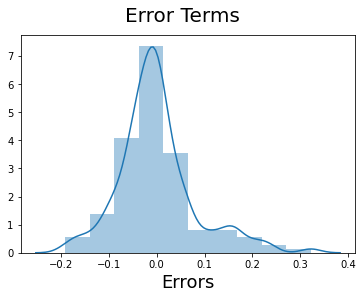

In [237]:
fig = plt.figure()
sns.distplot((y_trainRFE - y_train_priceRFE), bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

#### Making Predictions (UsingRFE)

In [668]:

df_test_rfe.head()



fueltype  aspiration  doornumber  enginelocation  wheelbase  carlength  \
160         1           1           1               1   0.313793   0.409756   
186         1           1           1               1   0.368966   0.497561   
59          1           1           0               1   0.420690   0.596748   
165         1           1           0               1   0.272414   0.448780   
140         1           1           0               1   0.231034   0.263415   

     carwidth  carheight  curbweight  enginesize  boreratio    stroke  \
160  0.341667   0.460177    0.235066    0.139623   0.404762  0.424242   
186  0.433333   0.699115    0.305275    0.181132   0.404762  0.611111   
59   0.516667   0.522124    0.347944    0.230189   0.563492  0.606061   
165  0.308333   0.424779    0.301396    0.139623   0.444444  0.449495   
140  0.291667   0.699115    0.291699    0.177358   0.746032  0.227273   

     compressionratio  horsepower   peakrpm   citympg  highwaympg   price  \
160           0.12500    0.091667  0.265306  0.694444    0.810811  7738.0   
186           0.12500    0.154167  0.448980  0.388889    0.459459  8495.0   
59            0.10000    0.150000  0.265306  0.361111    0.405405  8845.0   
165           0.15000    0.266667  1.000000  0.361111    0.324324  9298.0   
140           0.10625    0.104167  0.102041  0.361111    0.378378  7603.0   

     hardtop  hatchback  sedan  wagon  1bbl  2bbl  4bbl  idi  mfi  mpfi  spdi  \
160        0          0      1      0     0     1     0    0    0     0     0   
186        0          0      1      0     0     0     0    0    0     1     0   
59         0          1      0      0     0     1     0    0    0     0     0   
165        0          0      1      0     0     0     0    0    0     1     0   
140        0          1      0      0     0     1     0    0    0     0     0   

     fwd  rwd  dohc  l  ohc  ohcf  ohcv  rotor  audi  bmw  buick  chevrolet  \
160    1    0     0  0    1     0     0      0     0    0      0          0   
186    1    0     0  0    1     0     0      0     0    0      0          0   
59     1    0     0  0    1     0     0      0     0    0      0          0   
165    0    1     1  0    0     0     0      0     0    0      0          0   
140    0    0     0  0    0     1     0      0     0    0      0          0   

     dodge  honda  isuzu  jaguar  mazda  mercury  mitsubishi  nissan  peugeot  \
160      0      0      0       0      0        0           0       0        0   
186      0      0      0       0      0        0           0       0        0   
59       0      0      0       0      1        0           0       0        0   
165      0      0      0       0      0        0           0       0        0   
140      0      0      0       0      0        0           0       0        0   

     plymouth  porsche  renault  saab  subaru  toyota  volkswagen  volvo  \
160         0        0        0     0       0       1           0      0   
186         0        0        0     0       0       0           1      0   
59          0        0        0     0       0       0           0      0   
165         0        0        0     0       0       1           0      0   
140         0        0        0     0       1       0           0      0   

     eight  five  four  six  three  two  6_safe  5_safe  4_safe  3_safe  \
160      0     0     1    0      0    0       0       0       1       0   
186      0     0     1    0      0    0       0       0       0       0   
59       0     0     1    0      0    0       0       0       0       1   
165      0     0     1    0      0    0       0       0       0       1   
140      0     0     1    0      0    0       0       0       0       0   

     2_safe  
160       0  
186       1  
59        0  
165       0  
140       1

In [220]:
# Scale the RFE Test Data set: 
# df_test_rfe
df_test_rfe[num_vars] = scaler.transform(df_test_rfe[num_vars])


In [223]:
#df_test_rfe[num_vars] = scaler.inverse_transform(df_test_rfe[num_vars])
df_test_rfe[num_vars].head()

price  wheelbase  carlength  carwidth  carheight  curbweight  \
160  0.072382   0.313793   0.409756  0.341667   0.460177    0.235066   
186  0.093295   0.368966   0.497561  0.433333   0.699115    0.305275   
59   0.102964   0.420690   0.596748  0.516667   0.522124    0.347944   
165  0.115479   0.272414   0.448780  0.308333   0.424779    0.301396   
140  0.068652   0.231034   0.263415  0.291667   0.699115    0.291699   

     enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
160    0.139623   0.404762  0.424242           0.12500    0.091667  0.265306   
186    0.181132   0.404762  0.611111           0.12500    0.154167  0.448980   
59     0.230189   0.563492  0.606061           0.10000    0.150000  0.265306   
165    0.139623   0.444444  0.449495           0.15000    0.266667  1.000000   
140    0.177358   0.746032  0.227273           0.10625    0.104167  0.102041   

     highwaympg   citympg  
160    0.810811  0.694444  
186    0.459459  0.388889  
59     0.405405  0.361111  
165    0.324324  0.361111  
140    0.378378  0.361111

In [224]:
df_test_rfe.describe()

fueltype  aspiration  doornumber  enginelocation  wheelbase  \
count  62.000000   62.000000   62.000000       62.000000  62.000000   
mean    0.887097    0.822581    0.564516        0.967742   0.437764   
std     0.319058    0.385142    0.499868        0.178127   0.212861   
min     0.000000    0.000000    0.000000        0.000000   0.000000   
25%     1.000000    1.000000    0.000000        1.000000   0.313793   
50%     1.000000    1.000000    1.000000        1.000000   0.387931   
75%     1.000000    1.000000    1.000000        1.000000   0.570690   
max     1.000000    1.000000    1.000000        1.000000   1.182759   

       carlength   carwidth  carheight  curbweight  enginesize  boreratio  \
count  62.000000  62.000000  62.000000   62.000000   62.000000  62.000000   
mean    0.559481   0.480376   0.559663    0.428470    0.265673   0.556580   
std     0.189947   0.165440   0.215811    0.179488    0.162820   0.228484   
min     0.056911   0.183333   0.141593    0.128394    0.067925  -0.111111   
25%     0.459350   0.358333   0.384956    0.305275    0.177358   0.404762   
50%     0.547967   0.441667   0.588496    0.406129    0.226415   0.563492   
75%     0.719919   0.516667   0.699115    0.564876    0.316038   0.746032   
max     1.089431   0.975000   1.061947    0.935609    0.932075   0.888889   

          stroke  compressionratio  horsepower    peakrpm    citympg  \
count  62.000000         62.000000   62.000000  62.000000  62.000000   
mean    0.544314          0.209375    0.248858   0.393351   0.328405   
std     0.160738          0.273690    0.163376   0.192092   0.172009   
min    -0.060606          0.000000    0.016667   0.000000   0.027778   
25%     0.484848          0.093750    0.107292   0.265306   0.166667   
50%     0.585859          0.125000    0.218750   0.346939   0.305556   
75%     0.641414          0.150000    0.295833   0.540816   0.444444   
max     0.863636          1.000000    0.662500   1.000000   0.694444   

       highwaympg      price    hardtop  hatchback      sedan      wagon  \
count   62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean     0.363993   0.239439   0.080645   0.338710   0.451613   0.096774   
std      0.181845   0.233076   0.274512   0.477134   0.501716   0.298064   
min     -0.027027   0.007763   0.000000   0.000000   0.000000   0.000000   
25%      0.216216   0.092342   0.000000   0.000000   0.000000   0.000000   
50%      0.351351   0.158991   0.000000   0.000000   0.000000   0.000000   
75%      0.459459   0.317243   0.000000   1.000000   1.000000   0.000000   
max      0.810811   1.112855   1.000000   1.000000   1.000000   1.000000   

            1bbl       2bbl  4bbl        idi        mfi       mpfi       spdi  \
count  62.000000  62.000000  62.0  62.000000  62.000000  62.000000  62.000000   
mean    0.048387   0.258065   0.0   0.112903   0.016129   0.500000   0.048387   
std     0.216335   0.441142   0.0   0.319058   0.127000   0.504082   0.216335   
min     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.0   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.0   0.000000   0.000000   0.500000   0.000000   
75%     0.000000   0.750000   0.0   0.000000   0.000000   1.000000   0.000000   
max     1.000000   1.000000   0.0   1.000000   1.000000   1.000000   1.000000   

             fwd        rwd       dohc          l        ohc       ohcf  \
count  62.000000  62.000000  62.000000  62.000000  62.000000  62.000000   
mean    0.564516   0.419355   0.032258   0.048387   0.806452   0.048387   
std     0.499868   0.497482   0.178127   0.216335   0.398304   0.216335   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
50%     1.000000   0.000000   0.000000   0.000000   1.000000   0.000000   
75%     1.000000   1.000000   0.000000   0.000000   1.000000   0.000000   
max     1.

#### Divide  into X_test and y_test


In [225]:
y_test = df_test_rfe.pop('price')
X_test = df_test_rfe


In [238]:
y_testRFE = y_test

In [227]:
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

const  enginesize  bmw  eight  five  two
160    1.0    0.139623    0      0     0    0
186    1.0    0.181132    0      0     0    0
59     1.0    0.230189    0      0     0    0
165    1.0    0.139623    0      0     0    0
140    1.0    0.177358    0      0     0    0

In [239]:
y_predRFE = lm_8r.predict(X_test_new)


#### Model Evaluation (using RFE)

Text(0, 0.5, 'y_pred')

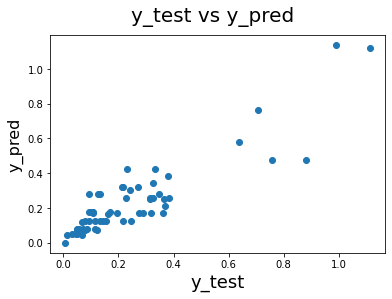

In [240]:
fig = plt.figure()
plt.scatter(y_testRFE,y_predRFE)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Text(0, 0.5, 'Car Price')

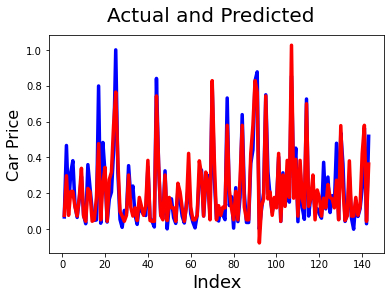

In [241]:

# pred=lm_8r.predict(X_test_new)# Actual vs Predicted
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_trainRFE, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_train_priceRFE, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)


Text(0, 0.5, 'Car Price')

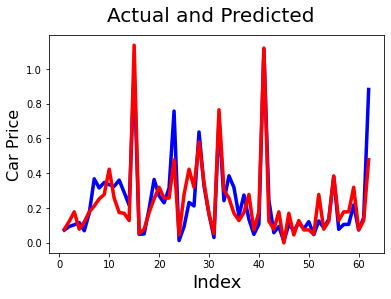

In [242]:

c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_testRFE, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,y_predRFE, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)


Mean_Squared_Error : 0.0066138685123489005
r_square_value : 0.8568221149360029


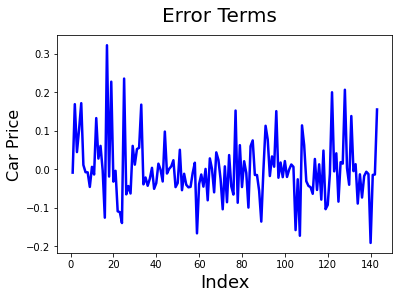

In [249]:
c = [i for i in range(1,144,1)]
fig = plt.figure()
plt.plot(c,y_trainRFE-y_train_priceRFE, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_trainRFE, y_train_priceRFE)
r_squared = r2_score(y_trainRFE, y_train_priceRFE)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.010384939200975937
r_square_value : 0.805700988576913


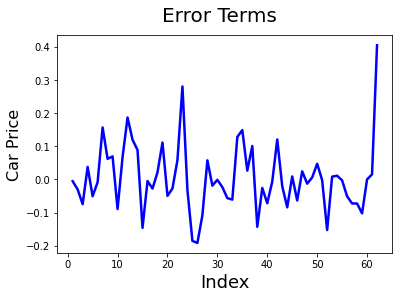

In [248]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_testRFE-y_predRFE, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_testRFE, y_predRFE)
r_squared = r2_score(y_testRFE, y_predRFE)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

In [ ]:

Conclusion : 

#### Based on different methods of Model Building and different Models across each of those categories, 

#### The solution for the problem statement is that the variables significant in predicting the price are 
1)Engine size
2)drivewheel -fwd /rwd , 
3)the number of cylinder :  four ,six,two or five


####  Based On Models , the predicted data  fits  over the actual price data closely  indicating the models generated are good.
#### The adjusted R2 of train and test are well over 80%. Indicating a good predictive model. 
The final models of each of the three methods 1) Adding variables one by one 2) Adding all variables and eliminating one by one 3) RFE model 
are reasonably good predictive models .
Note: 
1)RFE model the RSQUARE of test data: (shown in error terms plot)  is about 5% less than trained data.
2)whereas in the other two models the RSQQUARE of test data is only around 2% less than Rsqaure of train data .



In [ ]:
All Variables: Features	VIF
0	enginesize	4.31
1	rwd	2.44
3	six	2.04
2	four	1.94
R-squared:                       0.837  Adj. R-squared:                  0.832

In [ ]:
RFE : 
    Features	VIF
0	enginesize	1.37
2	eight	1.13
1	bmw	1.12
3	five	1.12
4	two	1.00

R-squared:                       0.857  Adj. R-squared:                  0.852

In [ ]:
Adding One variable at a time : 
 	Features	VIF
0	enginesize	4.31
3	rwd	2.44
2	six	2.04
1	four	1.94
R-squared:                       0.837 Adj. R-squared:                  0.832